In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [2]:
pd.set_option('display.max_rows', None)
df = pd.read_excel("Cardiac Rehab.xlsx")

In [3]:
df.head()

,Patient_Registration_Number,Race,Education_level,Patient_occupation,Health_funding,CR_Intake,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Triglyceride,...,Duration_Between_Ward_Enrollment,Duration_CR,Pre_BMI,Post_BMI,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Post_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range
0,8444773,Others,Form 6 / pre-university graduate,Government servant,Fully Funded,Yes,8 weeks,Low,Yes,1.0,...,114.0,126.0,19.027399,19.788495,Normal,Normal,Moderate,NaN,Vigorous Intensity,NaN
1,15302617,Chinese,Unknown,Self-employed (excludes housewives),Self funded,Yes,8 weeks,Intermediate,Yes,2.3,...,116.0,123.0,35.751278,35.049617,Obesity,Obesity,NaN,NaN,Vigorous Intensity,Vigorous Intensity
2,6862705,Others,College/university graduate,Self-employed (excludes housewives),Self funded,Yes,8 weeks,Intermediate,Yes,1.2,...,151.0,92.0,23.610200,23.224413,Overweight,Overweight,NaN,NaN,Moderate Intensity,NaN
3,2282933,Malay,Some secondary education,Government servant,Fully Funded,Yes,8 weeks,Intermediate,Yes,1.2,...,88.0,69.0,18.552876,19.817844,Normal,Normal,NaN,NaN,Vigorous Intensity,Vigorous Intensity
4,3531899,Malay,Unknown,Government servant,Fully Funded,Yes,8 weeks,Low,Yes,1.2,...,29.0,126.0,27.636054,27.352608,Obesity,Overweight,Hard,NaN,Vigorous Intensity,NaN


In [4]:
#drop irrelevant column
drop_column = ['Patient_Registration_Number',
               'Education_level',
                 'Health_funding',
                 'Residential_Postcode',
                 'postal_code',
                 'latitude',
                 'longitude',
                 'place_name',
                 'state_name']
df = df.drop(drop_column,axis=1).copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 94 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Race                                                 184 non-null    object 
 1   Patient_occupation                                   184 non-null    object 
 2   CR_Intake                                            184 non-null    object 
 3   Prescribed_Sessions                                  184 non-null    object 
 4   AACVPR_Risk_Category                                 184 non-null    object 
 5   CR_Adherence                                         184 non-null    object 
 6   Triglyceride                                         181 non-null    float64
 7   HDL                                                  180 non-null    float64
 8   LDL                                                  180 non-null    f

In [6]:
#make categorical
cats = df.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
   df[col] = df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 94 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Race                                                 184 non-null    category
 1   Patient_occupation                                   184 non-null    category
 2   CR_Intake                                            184 non-null    category
 3   Prescribed_Sessions                                  184 non-null    category
 4   AACVPR_Risk_Category                                 184 non-null    category
 5   CR_Adherence                                         184 non-null    category
 6   Triglyceride                                         181 non-null    float64 
 7   HDL                                                  180 non-null    float64 
 8   LDL                                                  180 non

In [8]:
#check missing values
missing_values = df.isna().sum()
print("Missing values:\n", missing_values)

Missing values:
 Race                                                    0
Patient_occupation                                      0
CR_Intake                                               0
Prescribed_Sessions                                     0
AACVPR_Risk_Category                                    0
CR_Adherence                                            0
Triglyceride                                            3
HDL                                                     4
LDL                                                     4
HbA1c                                                  17
Pre_Tobacco                                             0
Post_Tobacco                                            2
Pre_Weight                                             13
Post_Weight                                            26
Height                                                  8
Pre_Exercise_Stress_Test                                0
Pre_Peak_Heart_Rate                                    

       Triglyceride         HDL         LDL       HbA1c   Pre_Weight  \
count    173.000000  173.000000  173.000000  173.000000   173.000000   
mean       1.528412    1.014260    2.635207    6.331646   114.015337   
std        1.012313    0.444145    1.311552    1.561979   550.295018   
min        0.000000    0.000000    0.000000    3.700000    42.900000   
25%        1.000000    0.890000    1.870000    5.400000    61.300000   
50%        1.300000    1.020000    2.635207    5.900000    69.000000   
75%        2.000000    1.240000    3.620000    6.700000    79.100000   
max        6.400000    2.200000    5.770000   12.500000  7307.000000   

       Post_Weight      Height  Pre_Peak_Heart_Rate    Pre_METs  \
count   173.000000  173.000000           173.000000  167.000000   
mean     71.230667  165.513855           133.890511    7.047305   
std      12.067600    7.647890            20.270175    2.658807   
min      41.600000  145.000000            78.000000    2.300000   
25%      64.6000

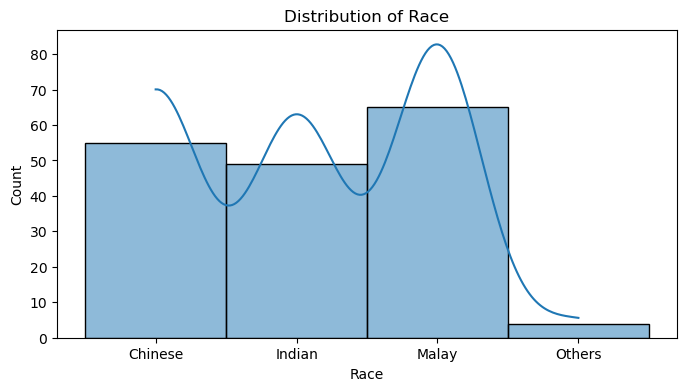

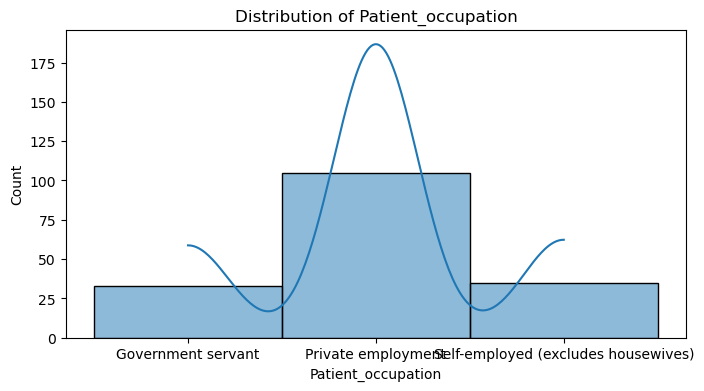

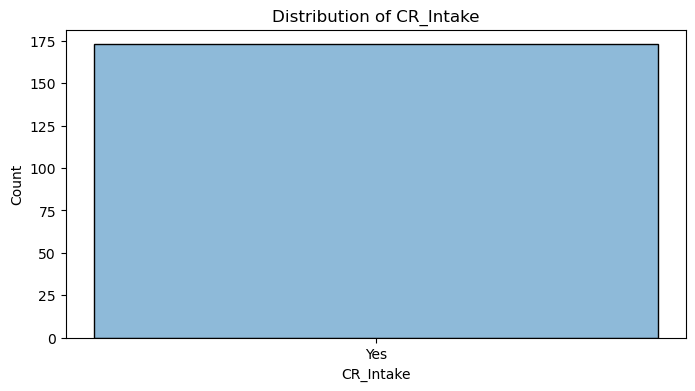

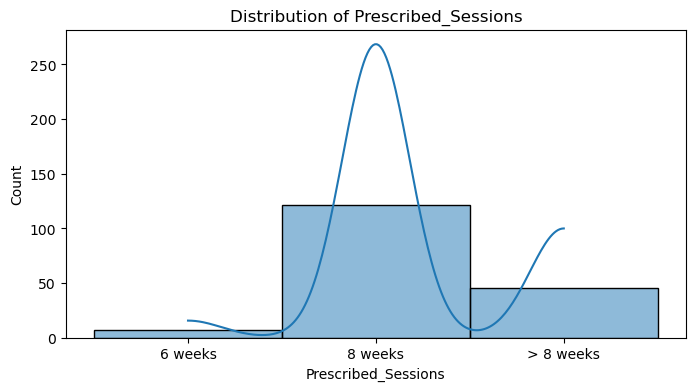

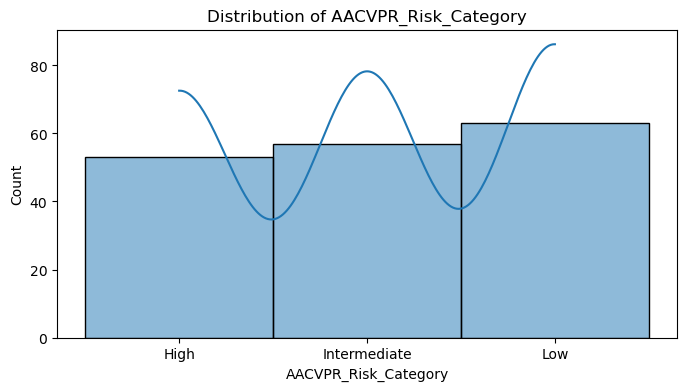

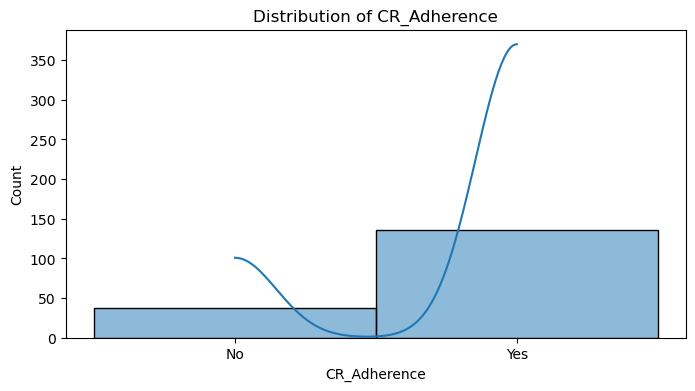

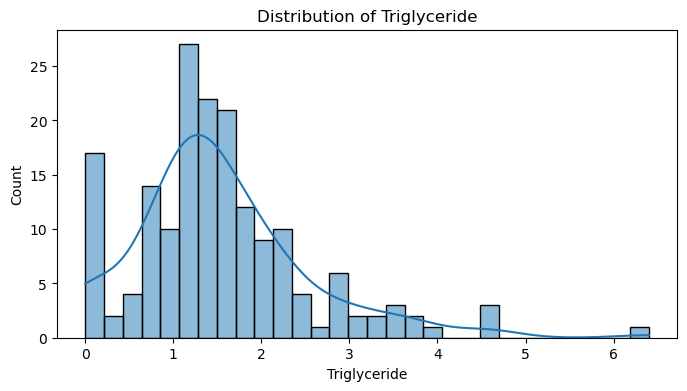

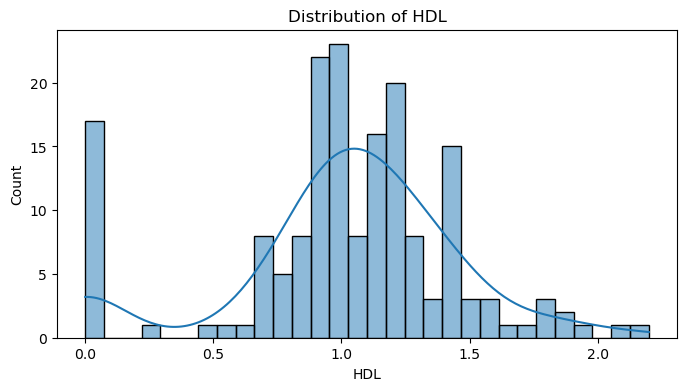

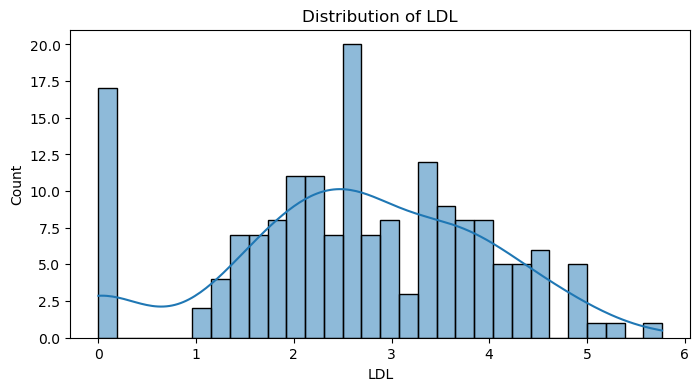

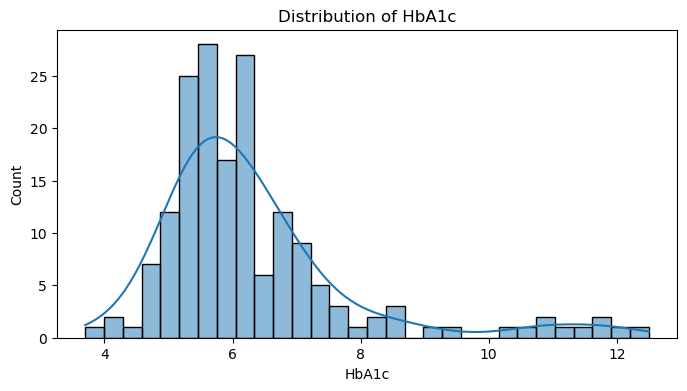

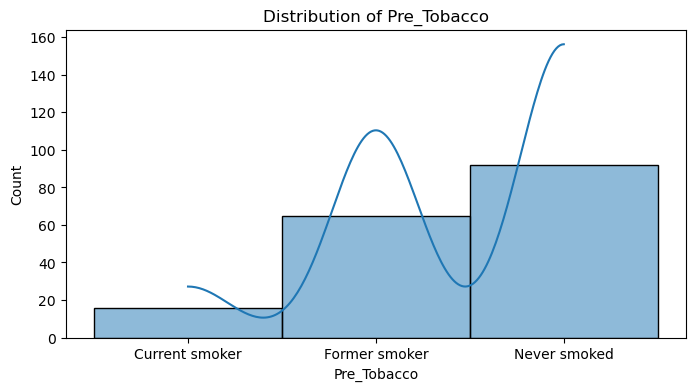

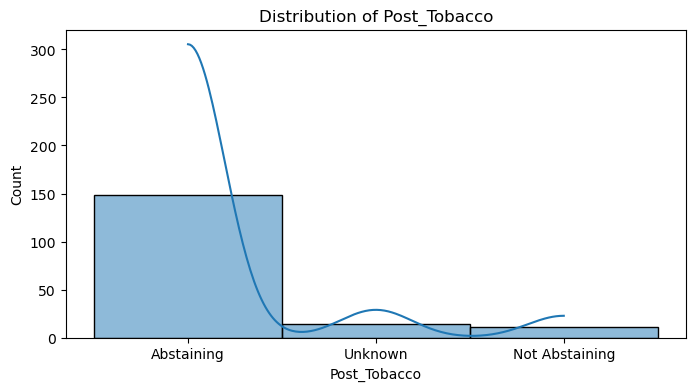

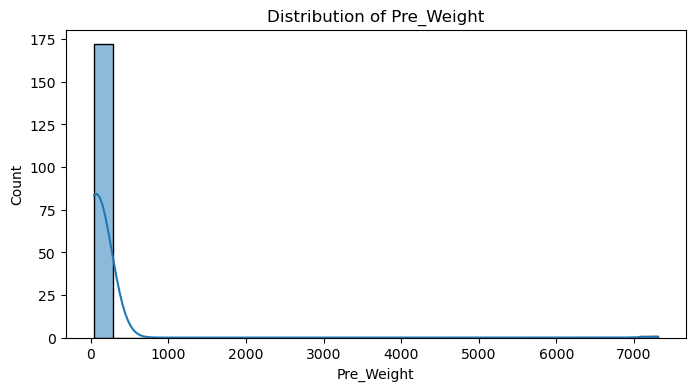

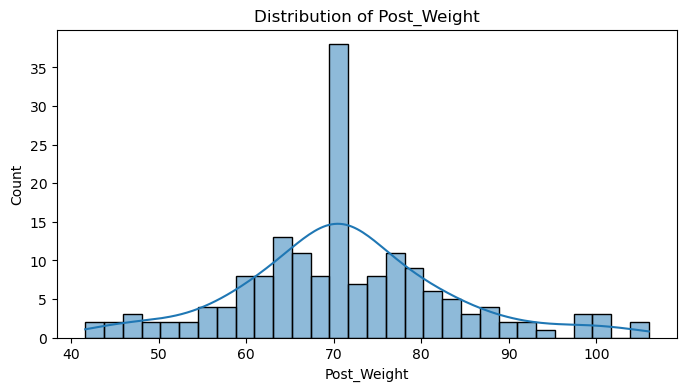

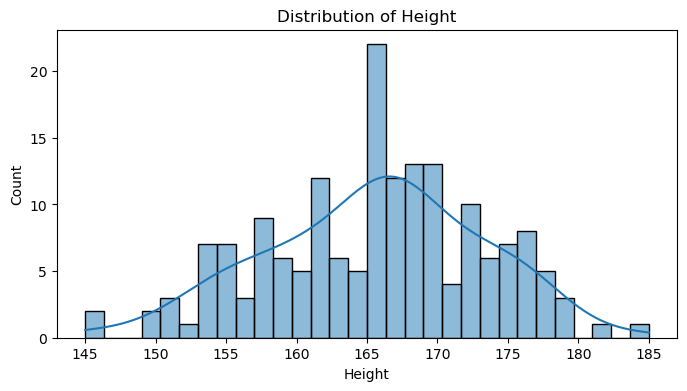

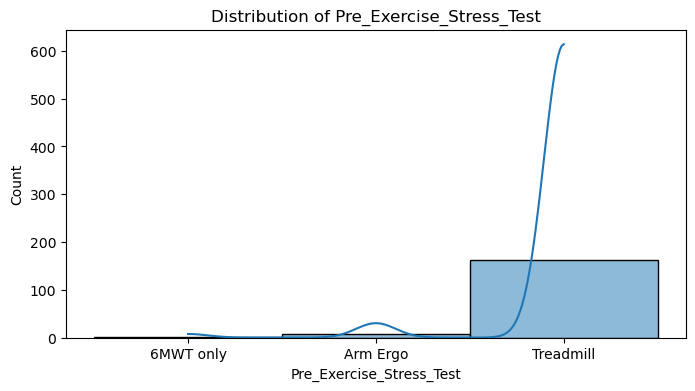

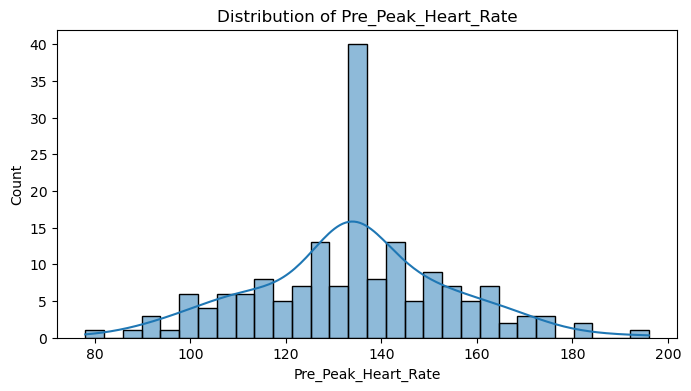

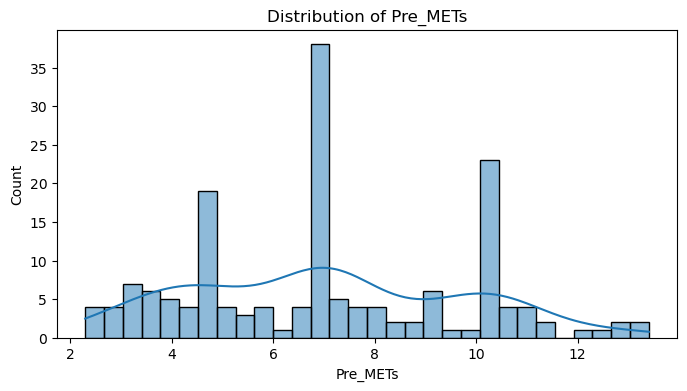

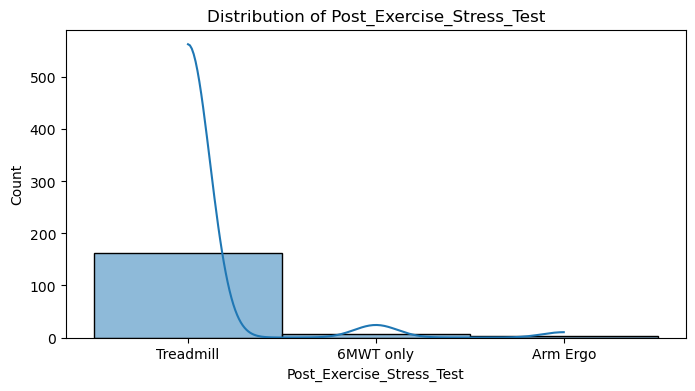

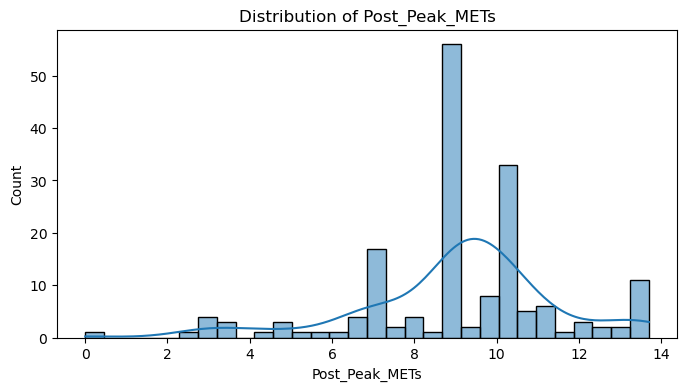

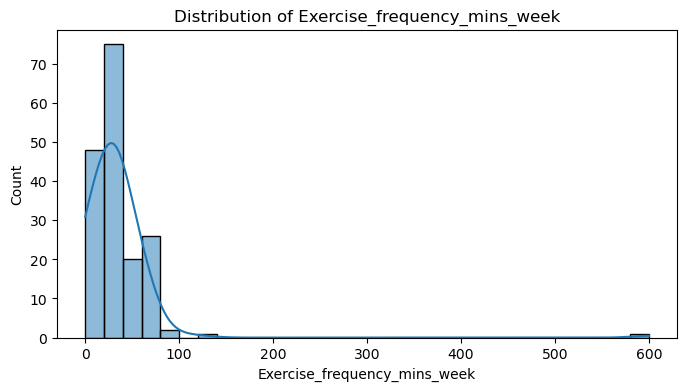

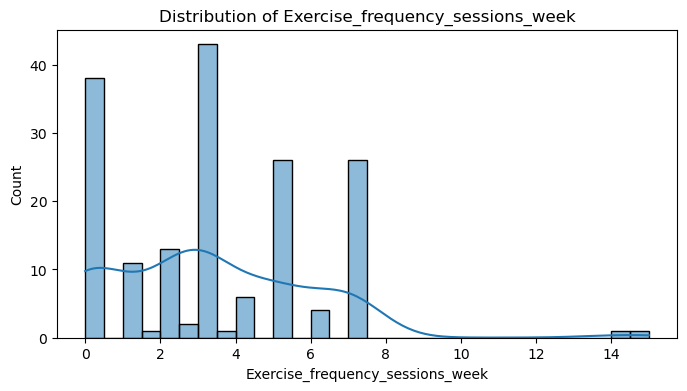

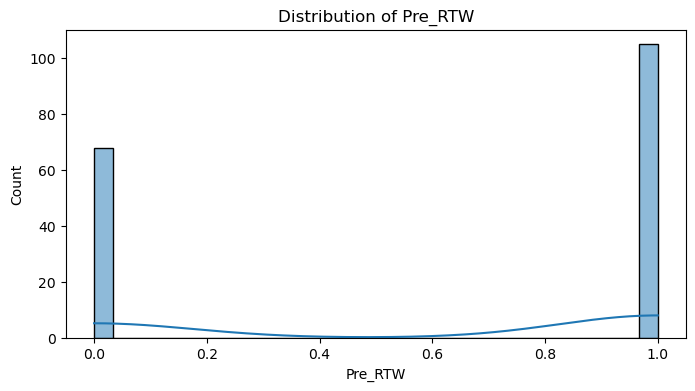

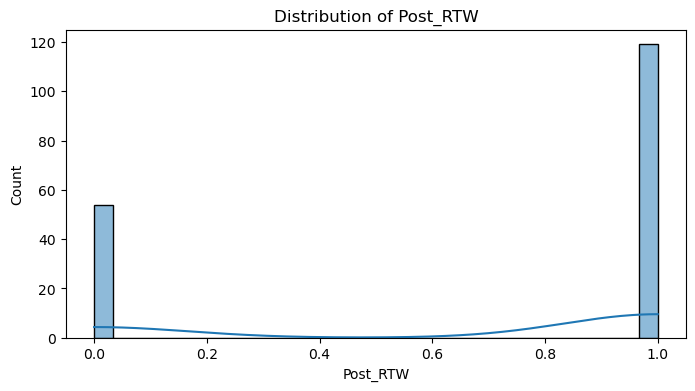

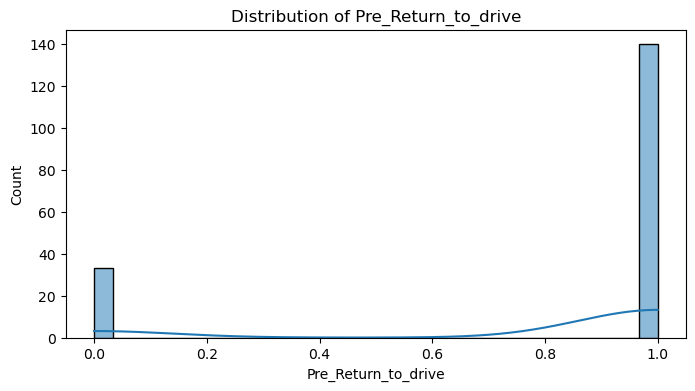

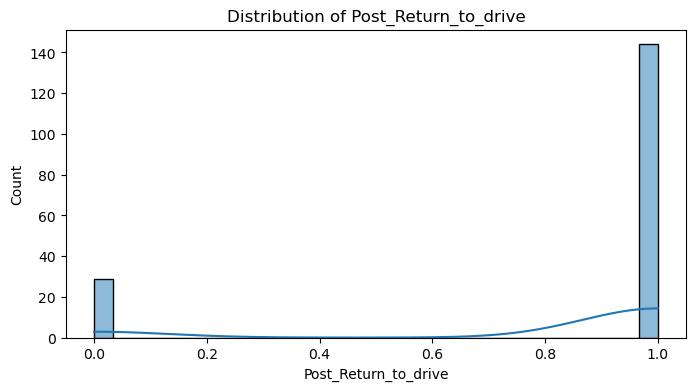

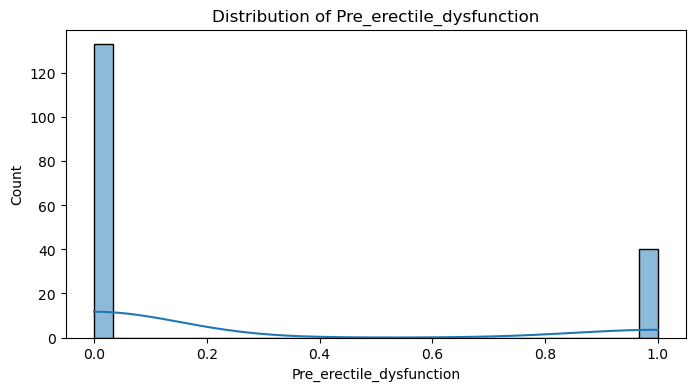

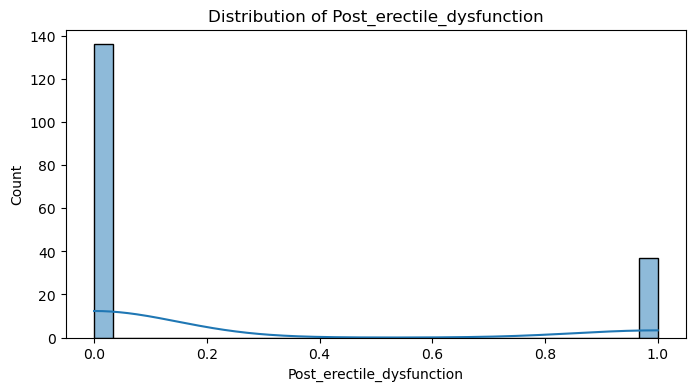

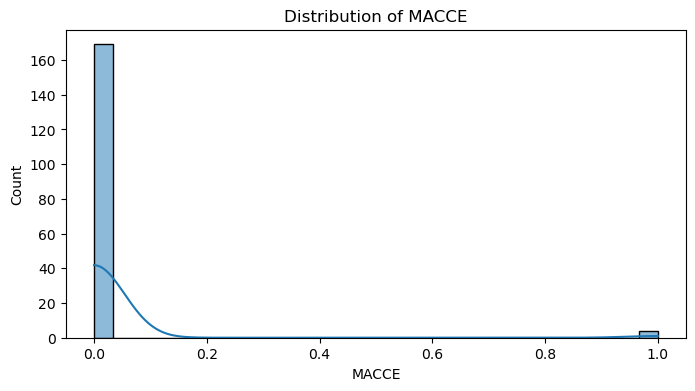

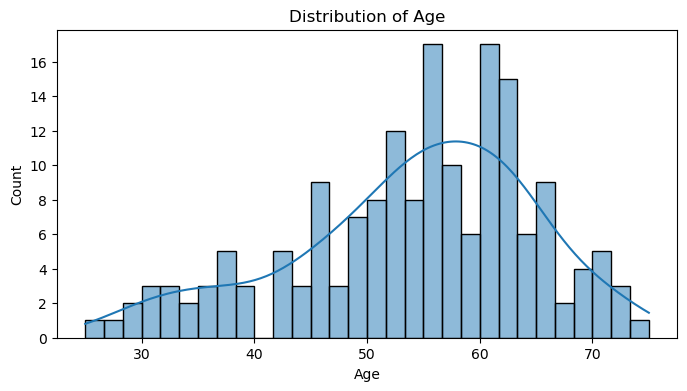

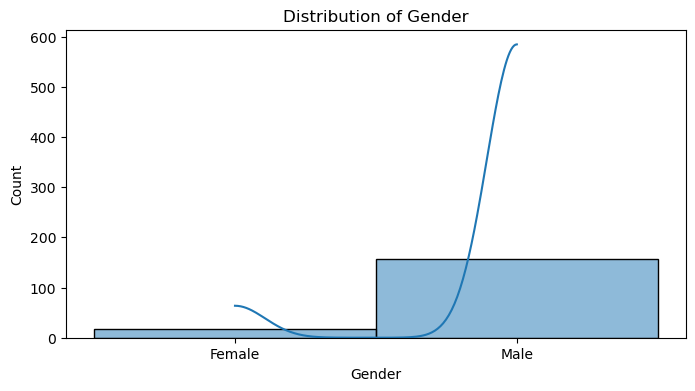

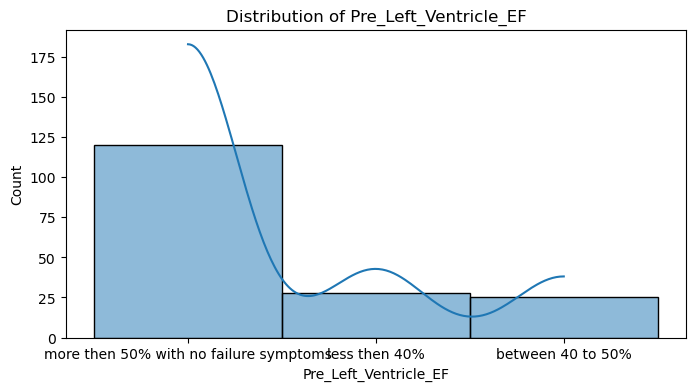

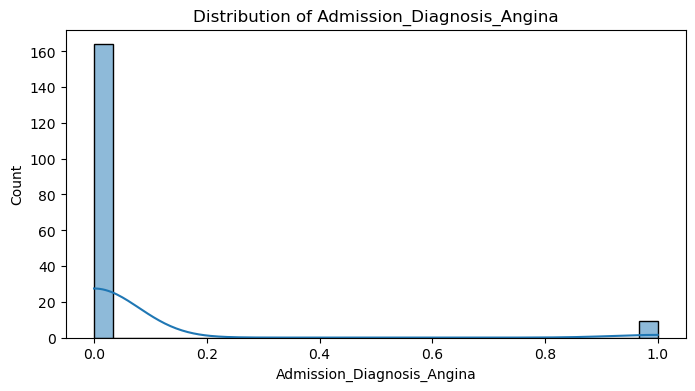

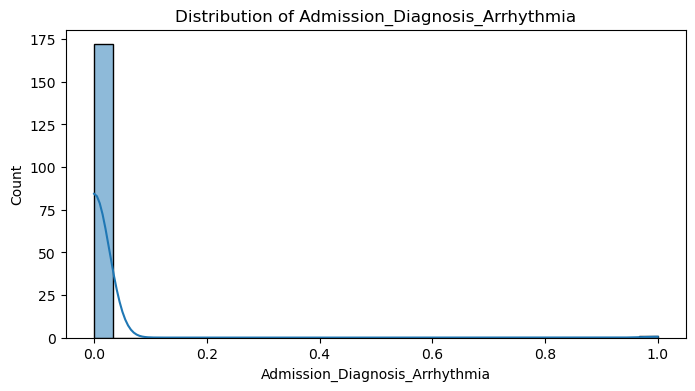

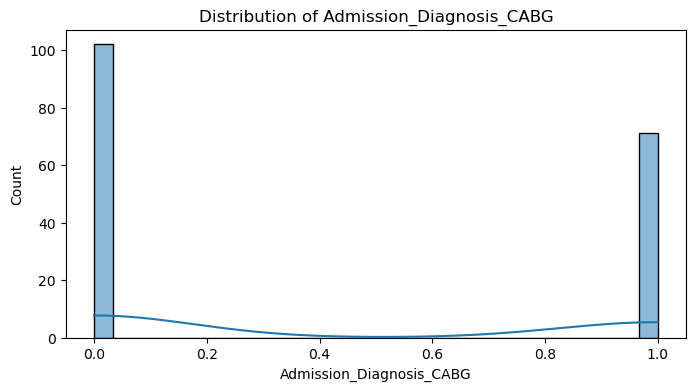

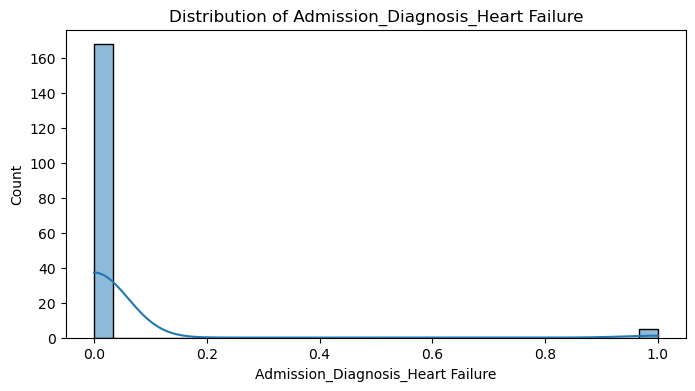

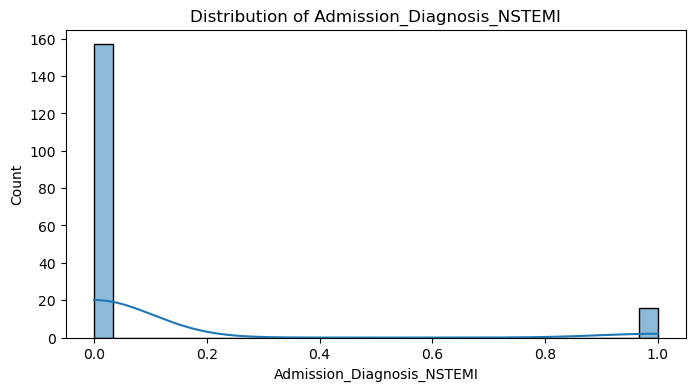

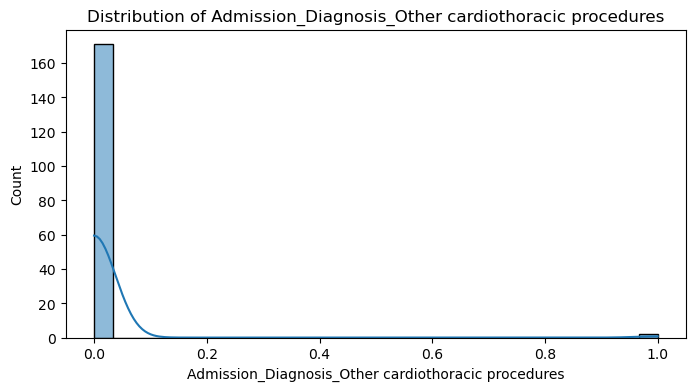

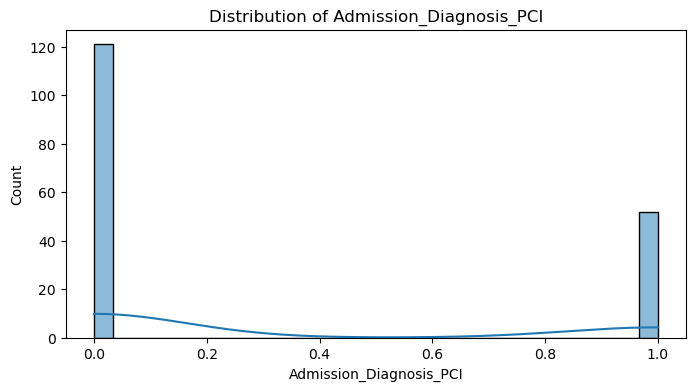

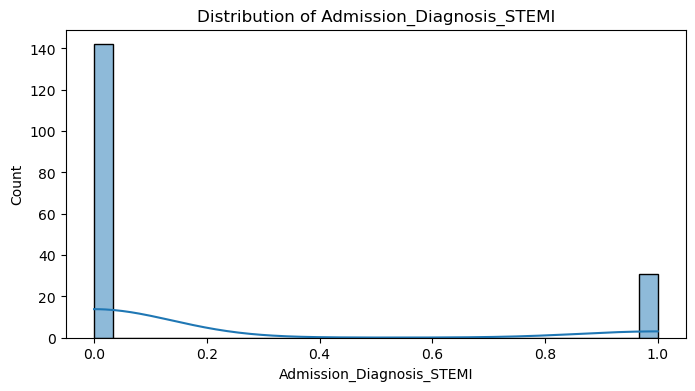

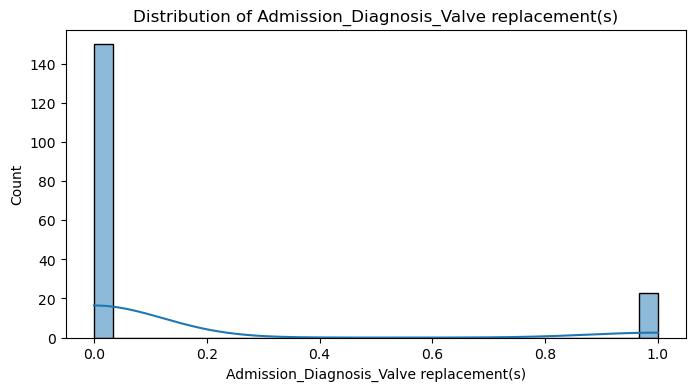

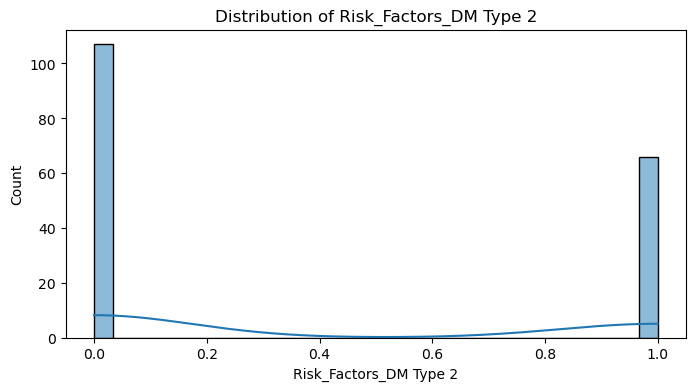

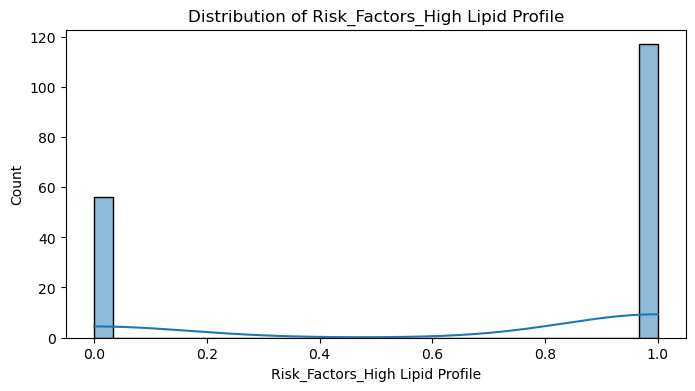

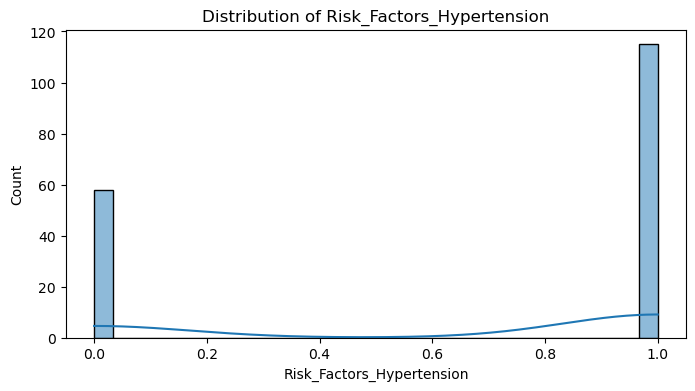

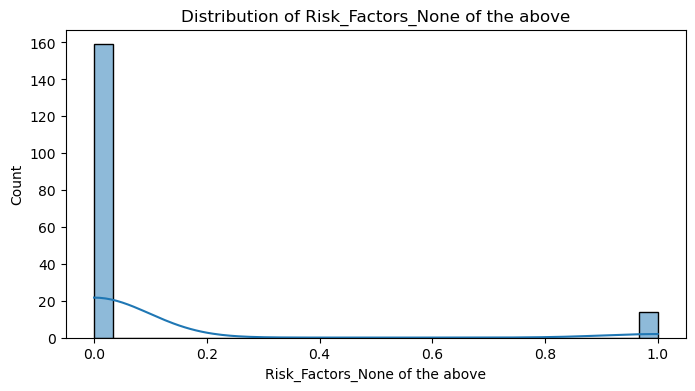

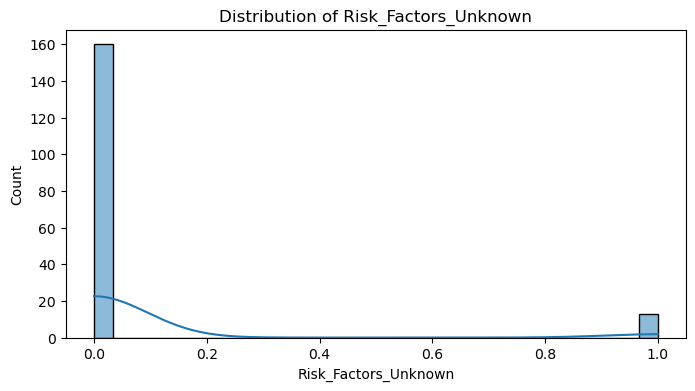

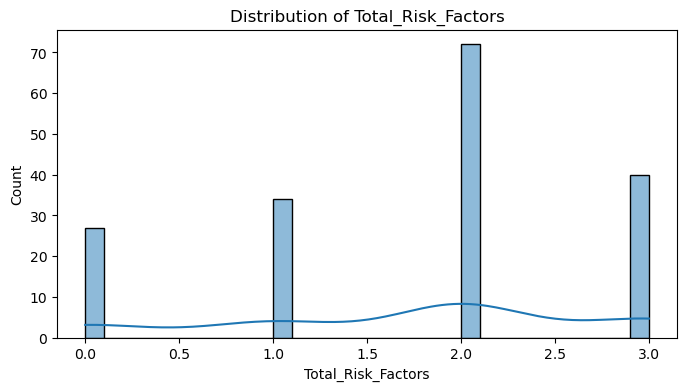

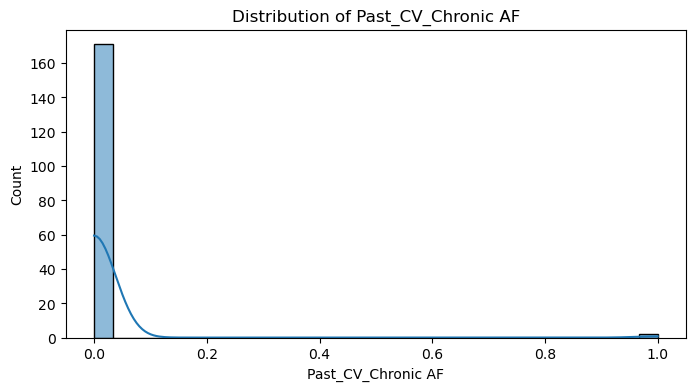

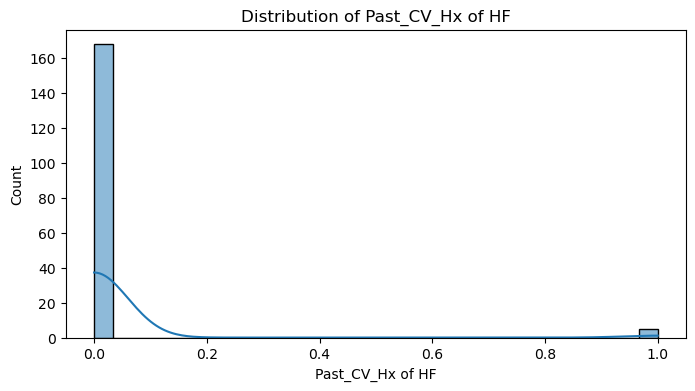

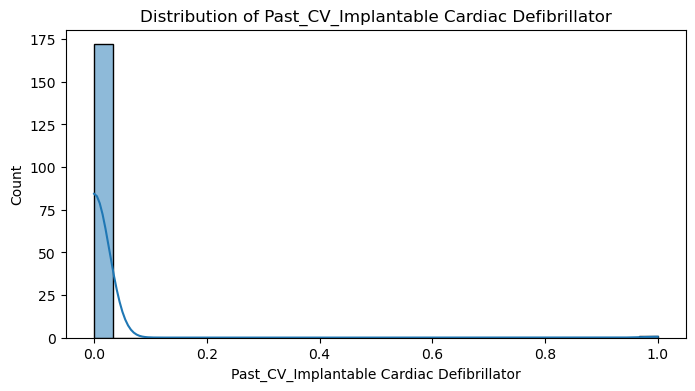

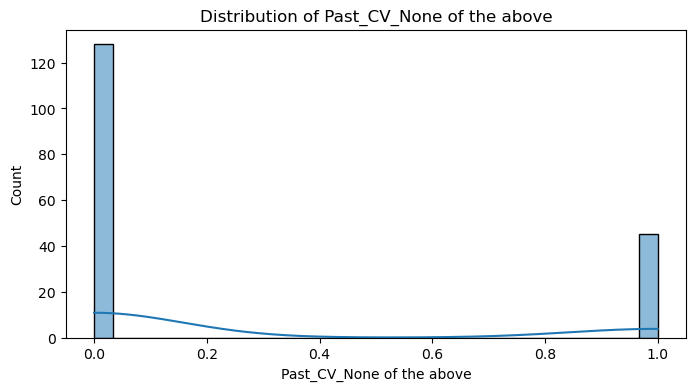

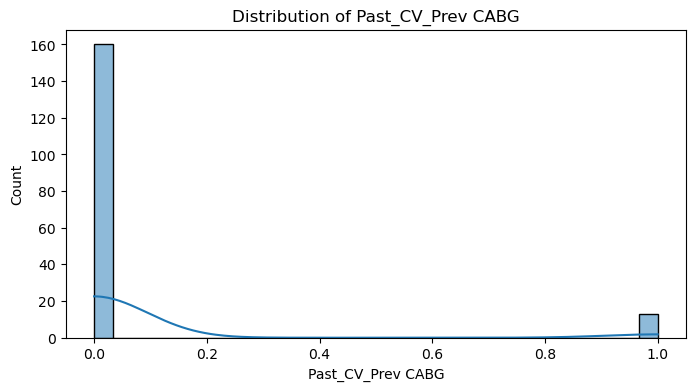

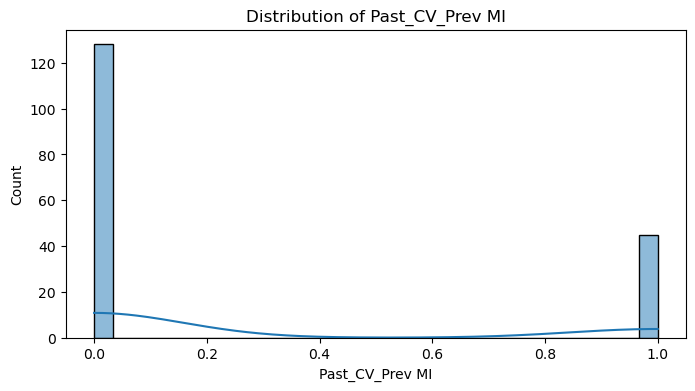

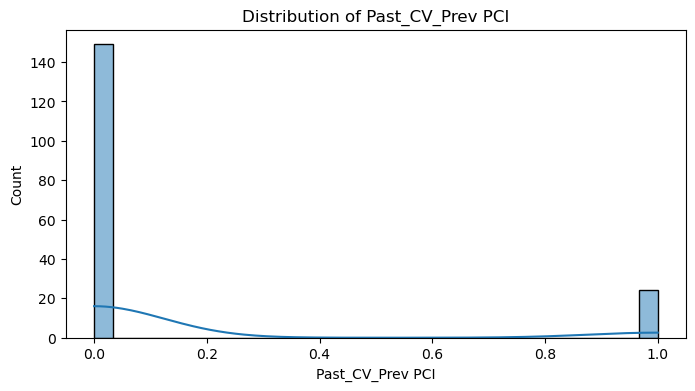

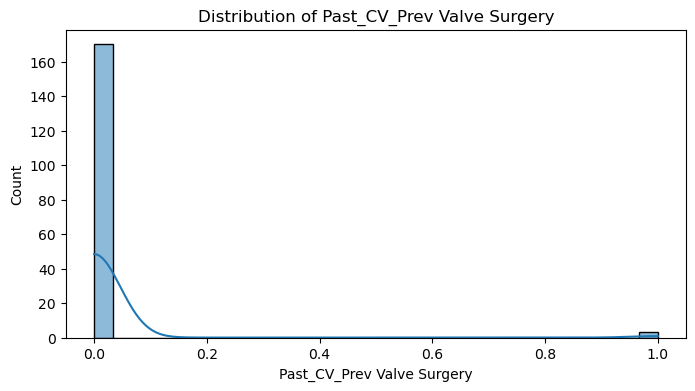

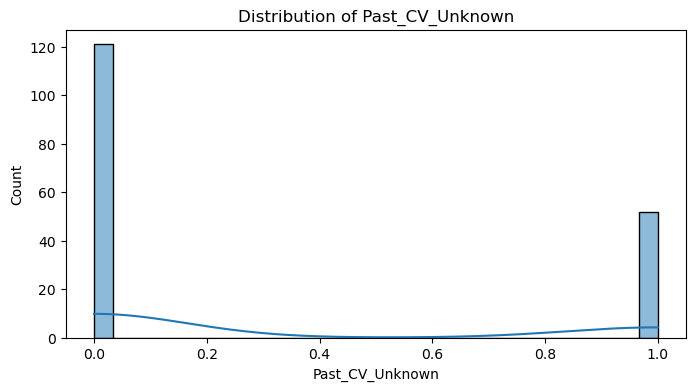

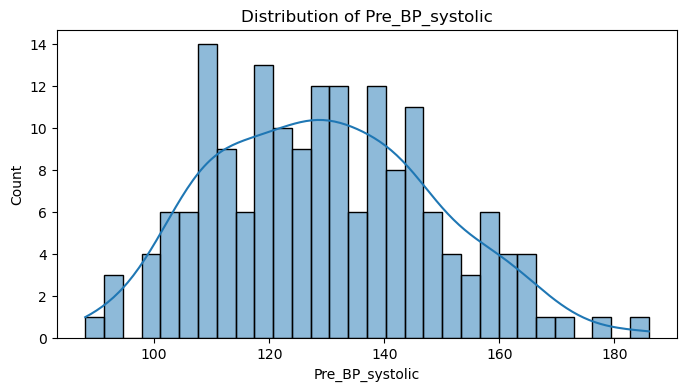

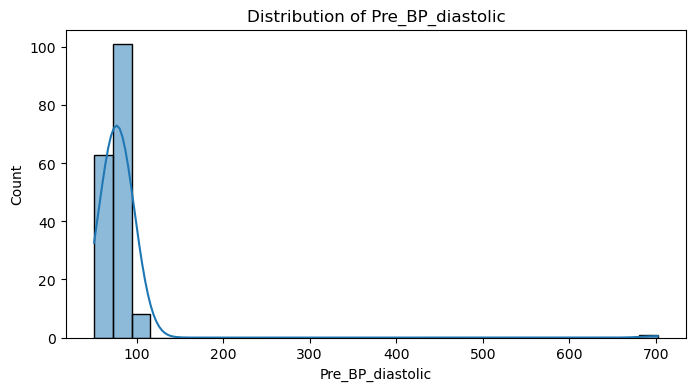

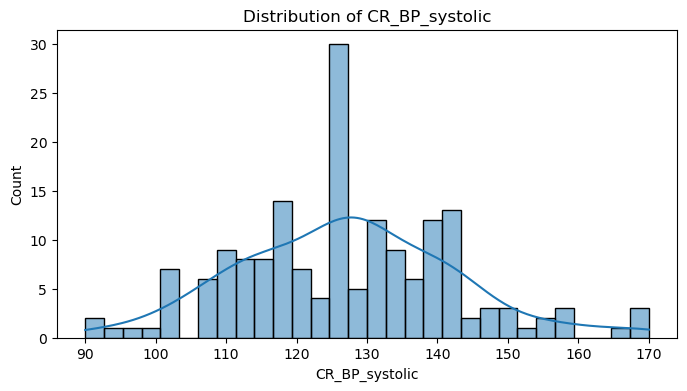

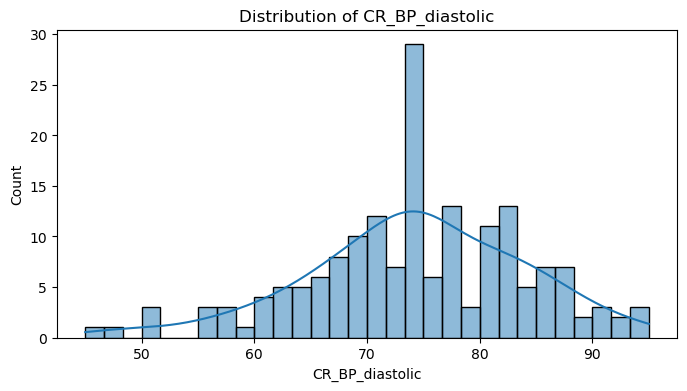

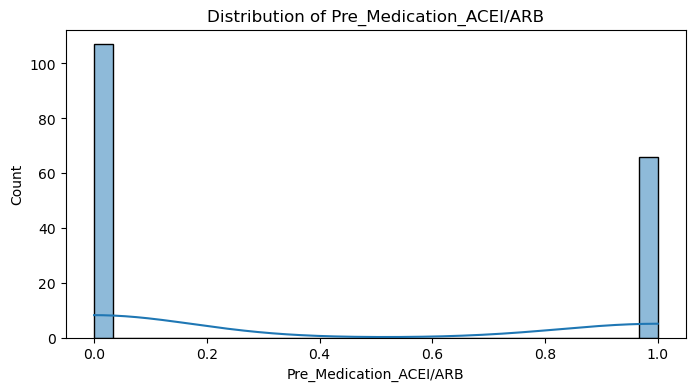

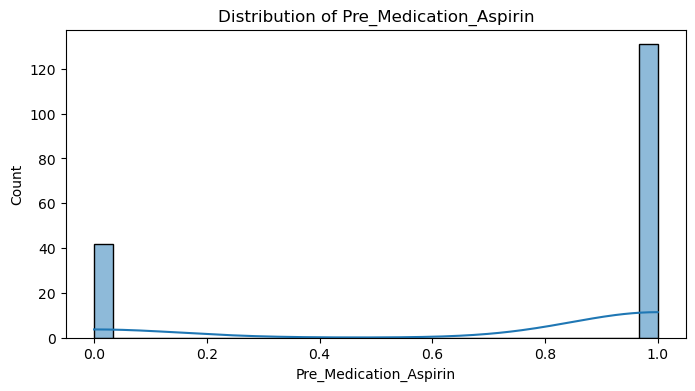

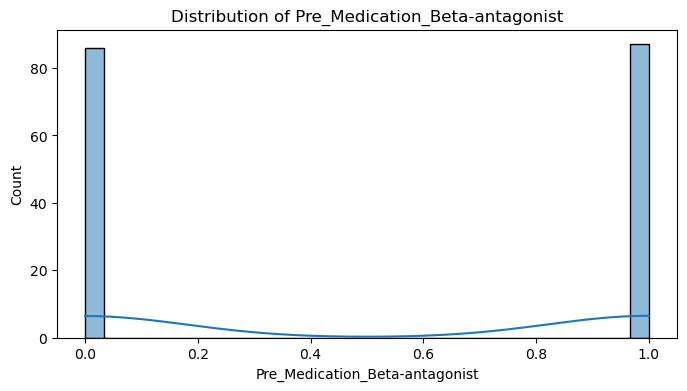

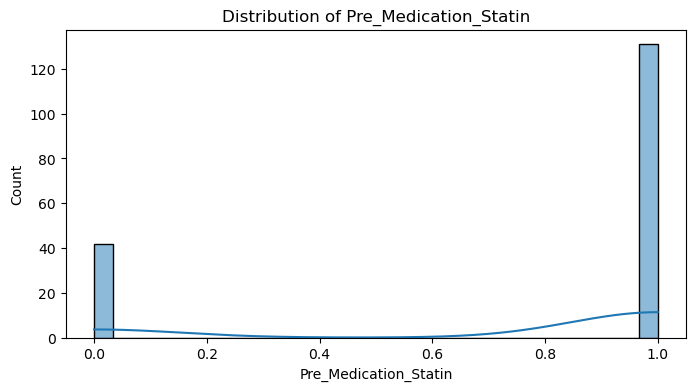

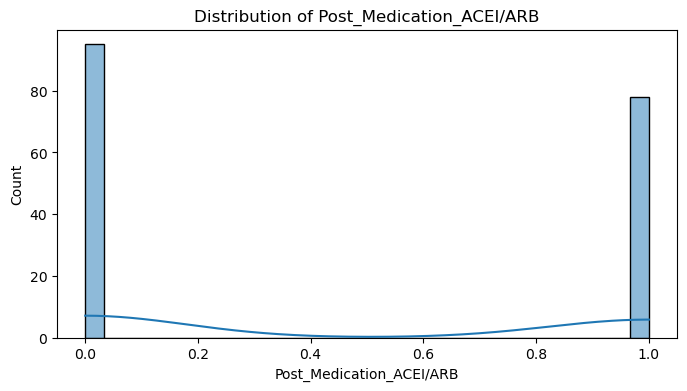

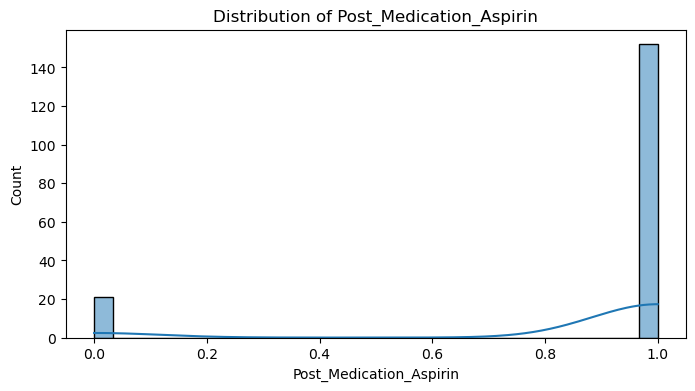

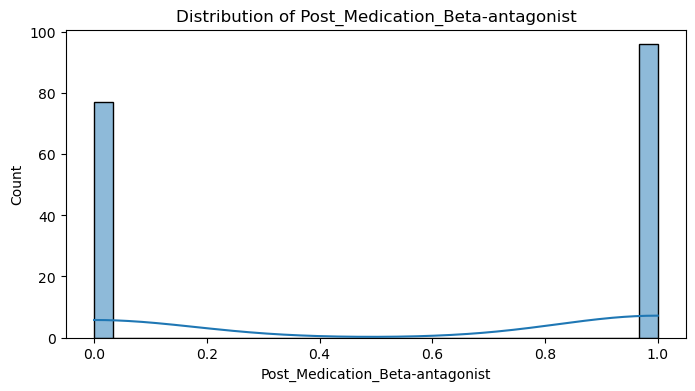

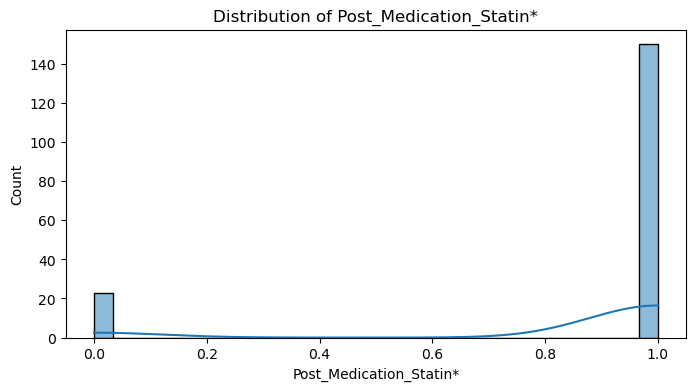

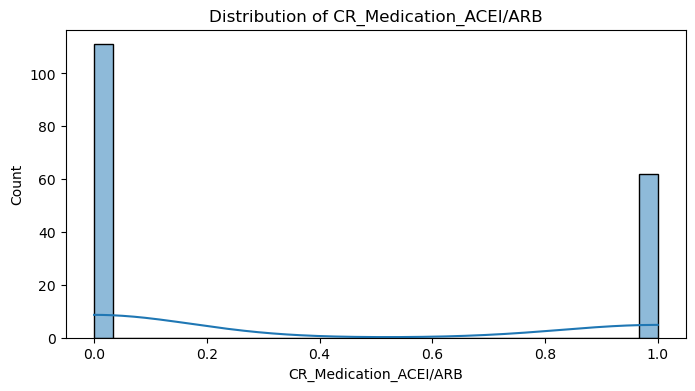

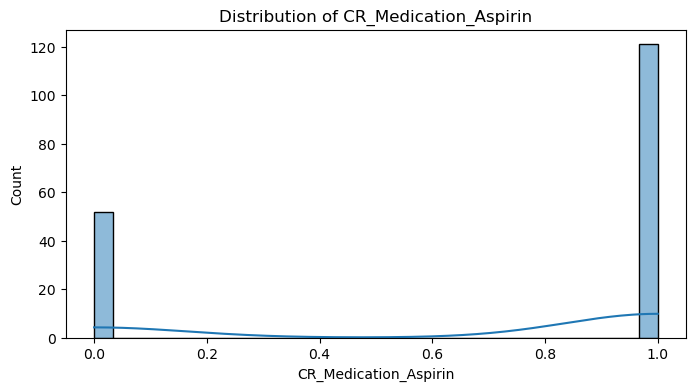

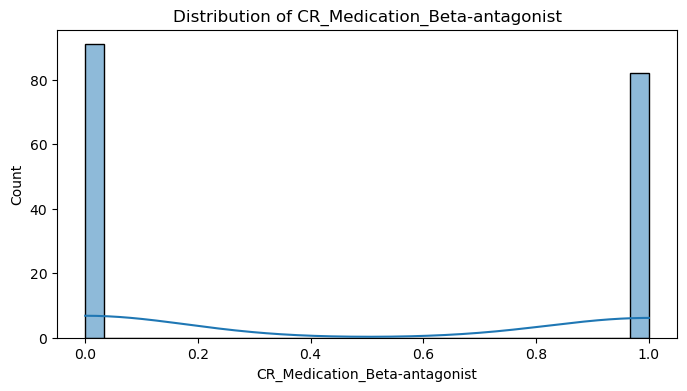

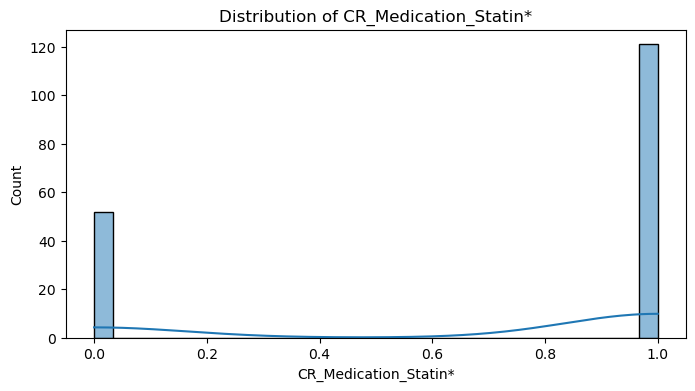

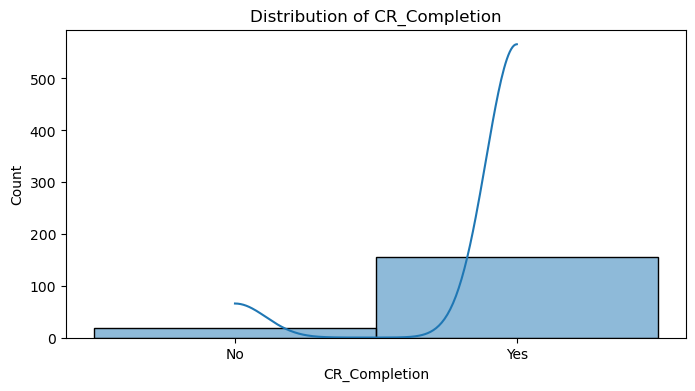

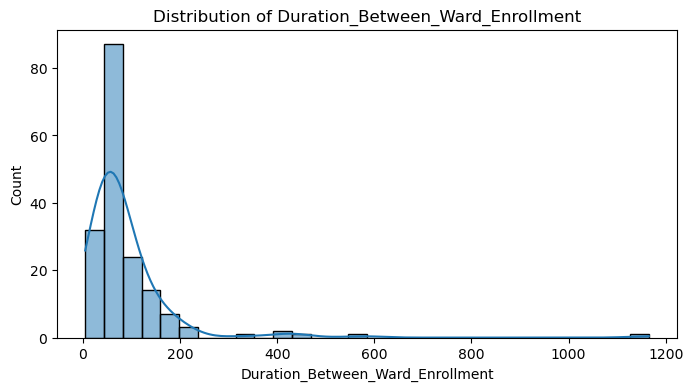

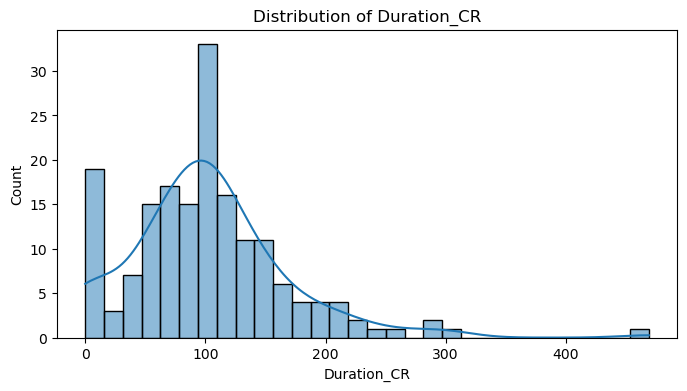

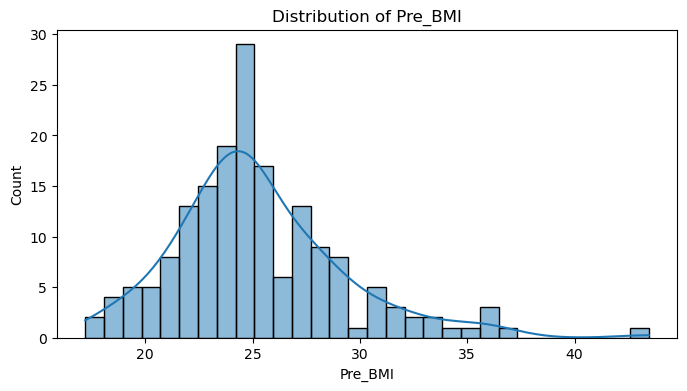

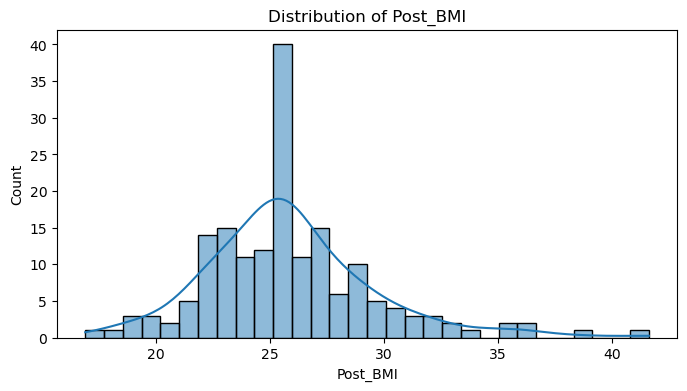

In [28]:
summary_stats = df.describe()
print(summary_stats)

# Step 2: Visualize the distribution of each variable
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()



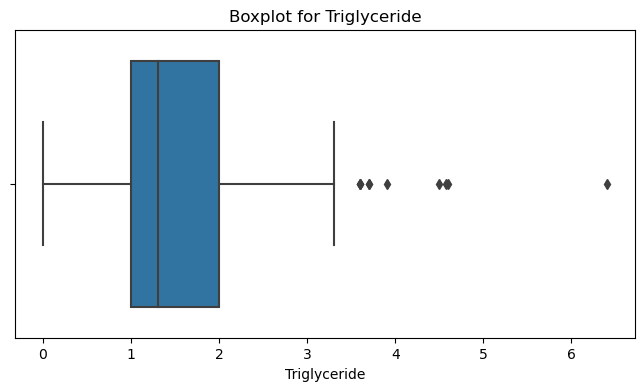

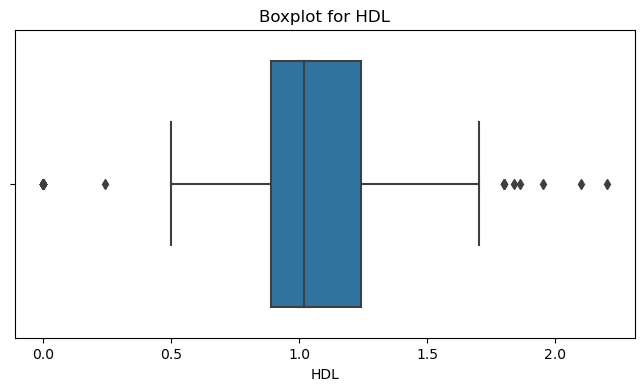

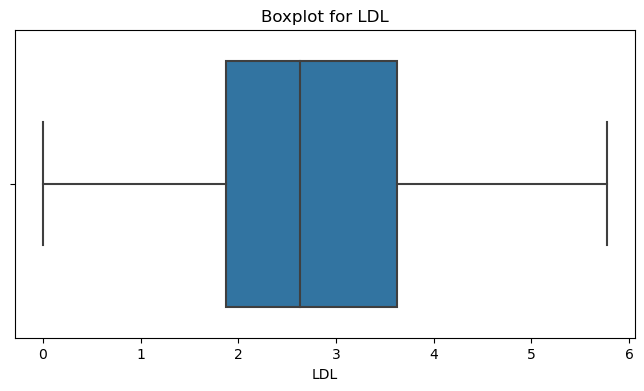

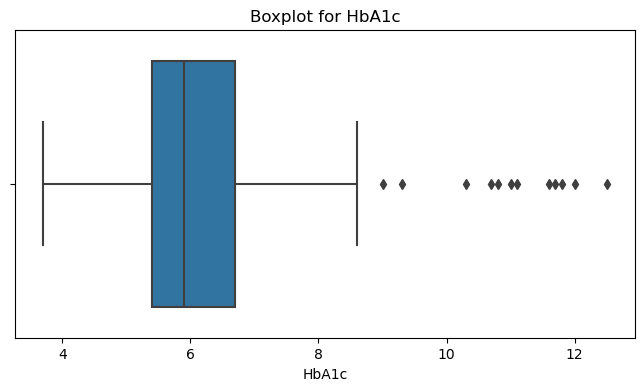

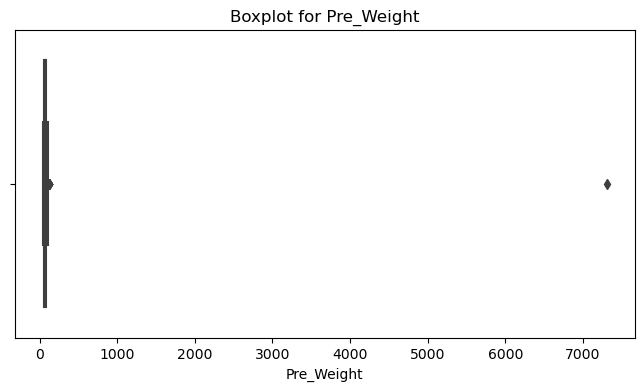

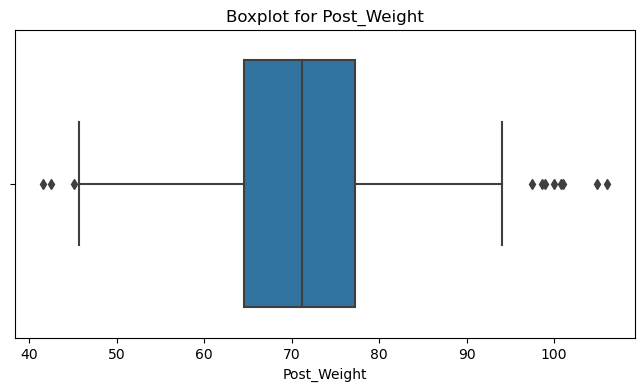

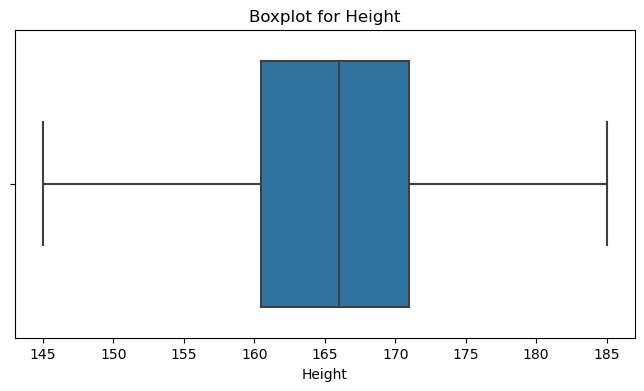

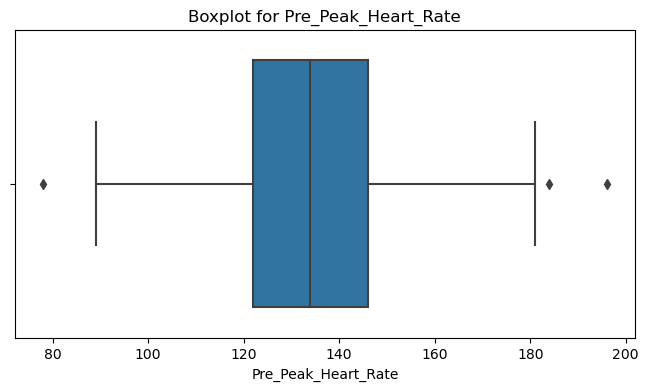

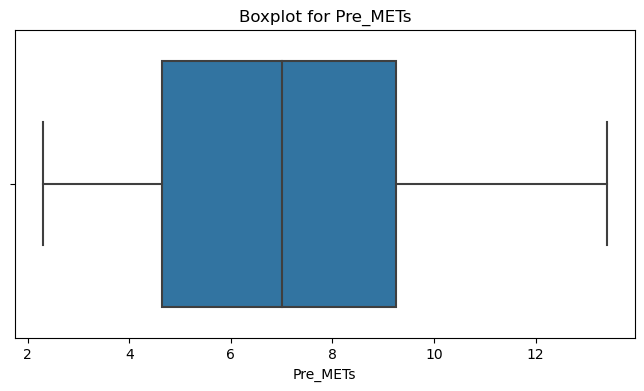

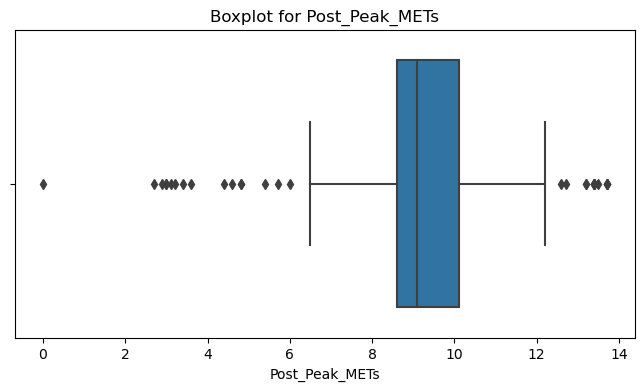

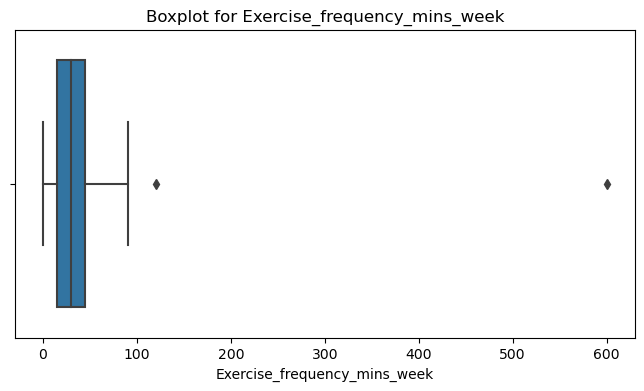

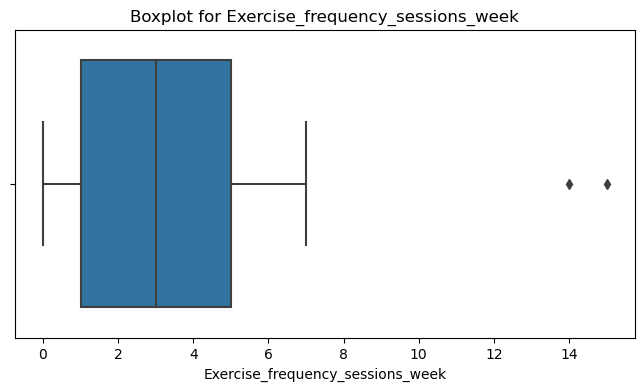

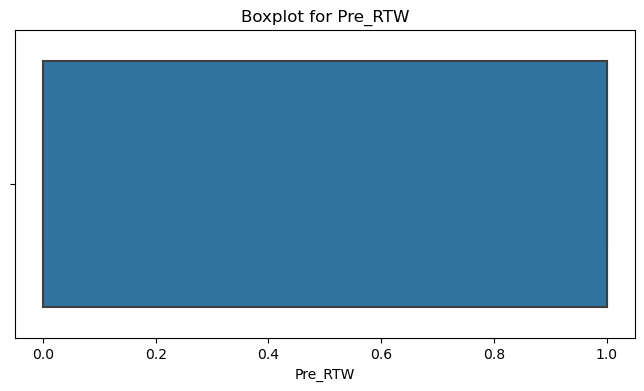

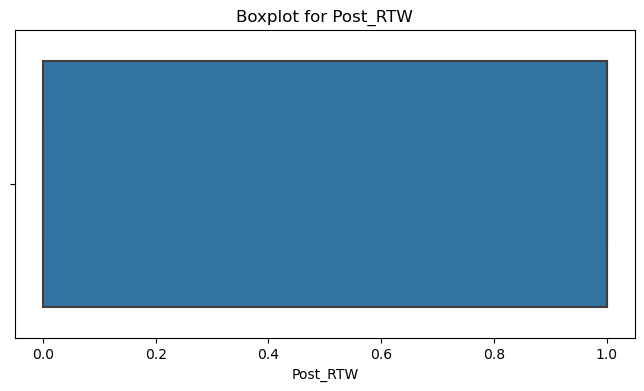

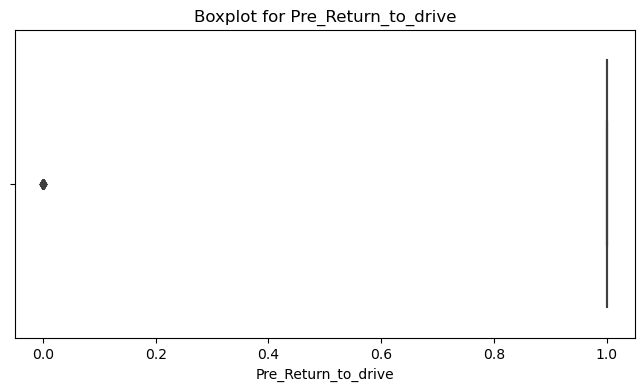

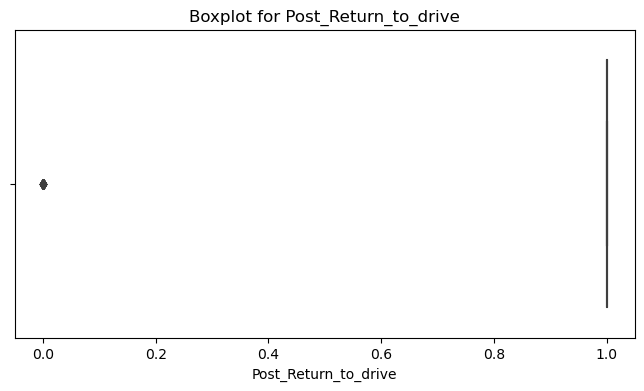

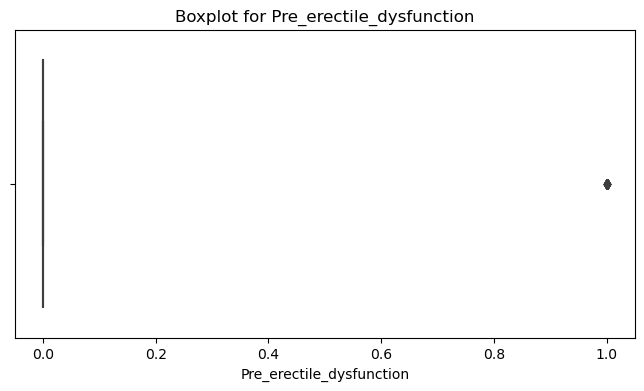

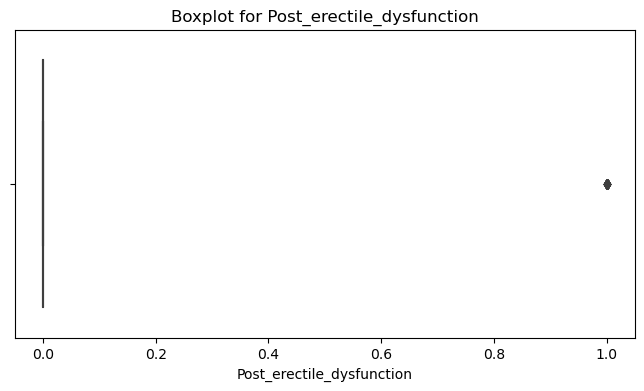

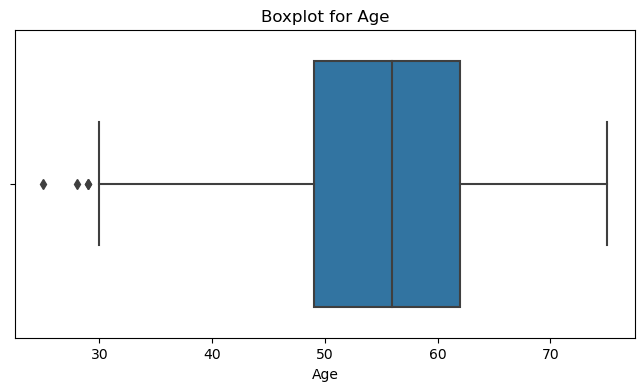

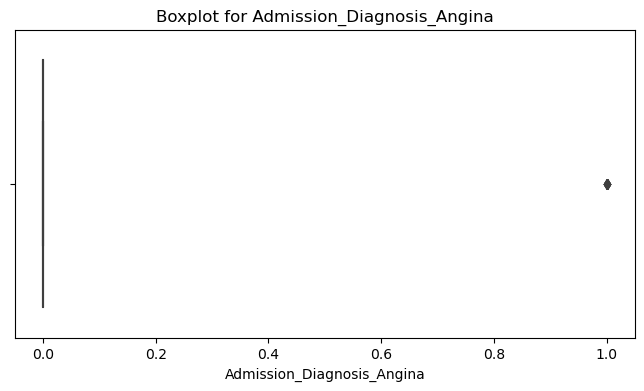

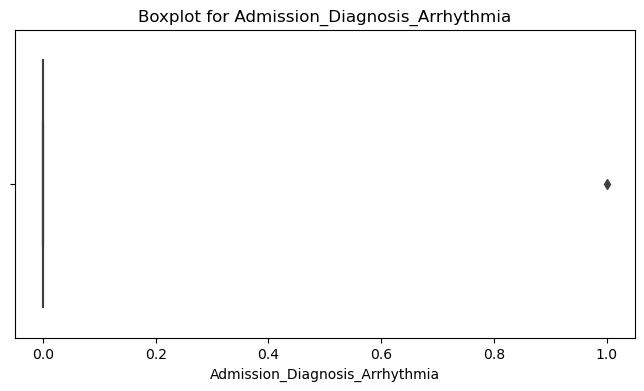

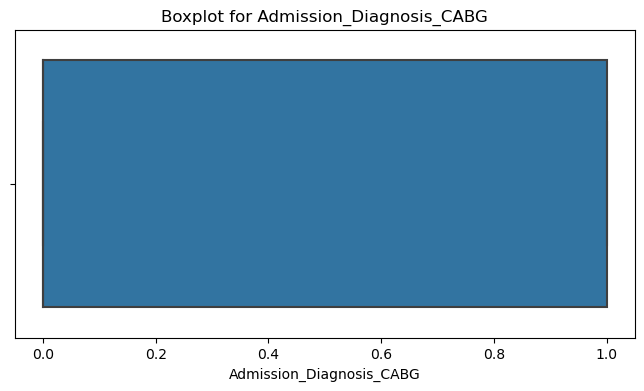

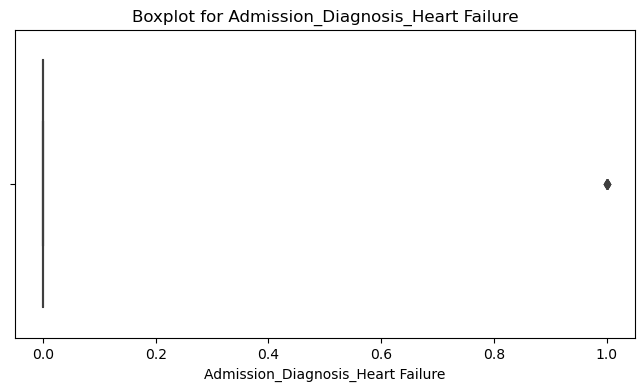

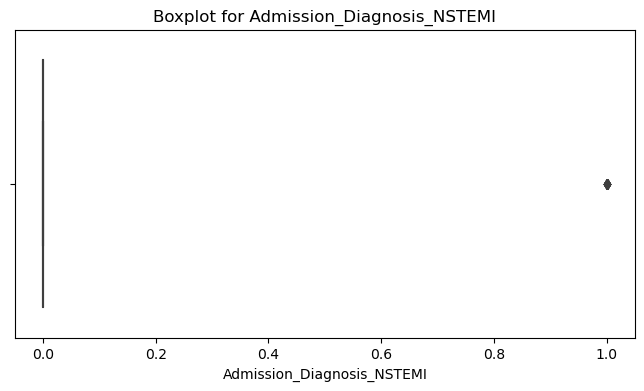

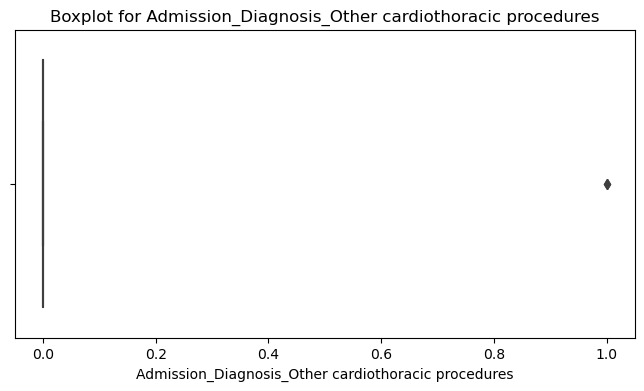

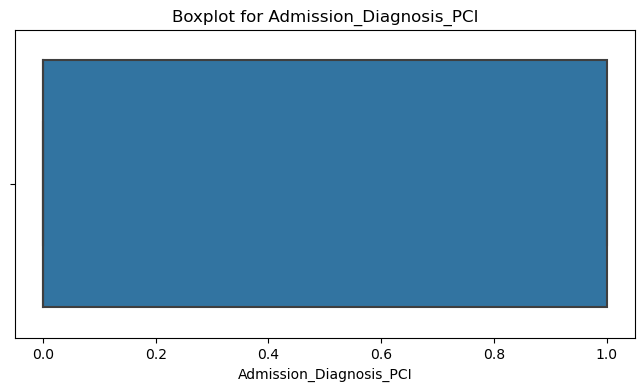

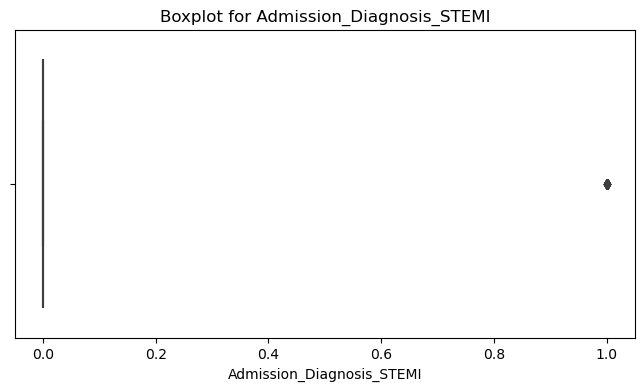

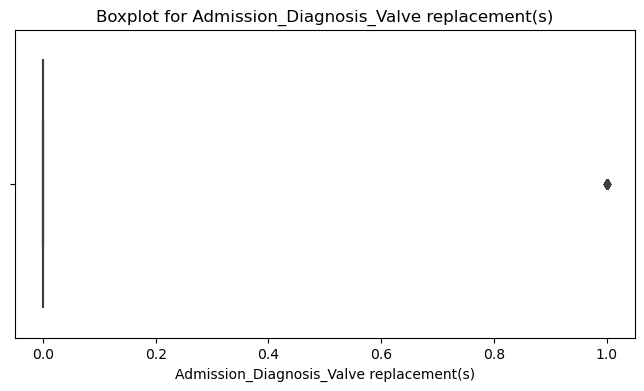

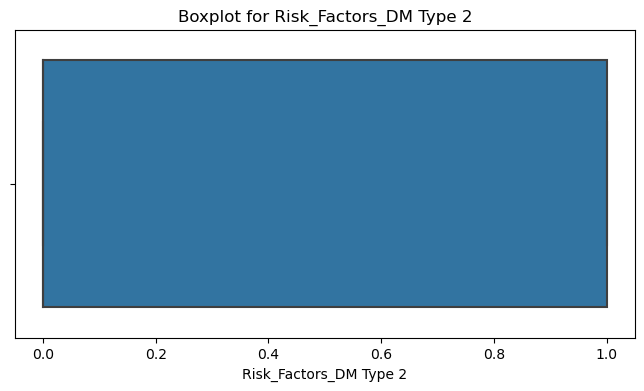

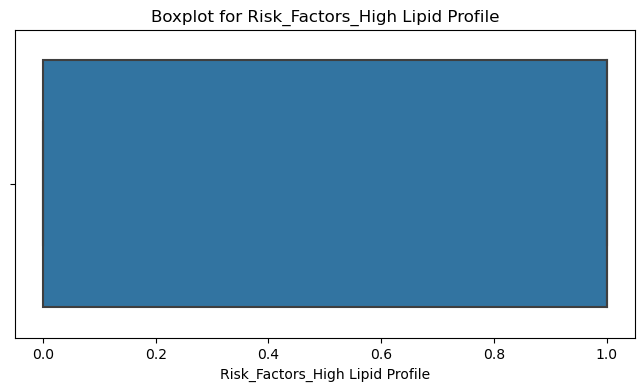

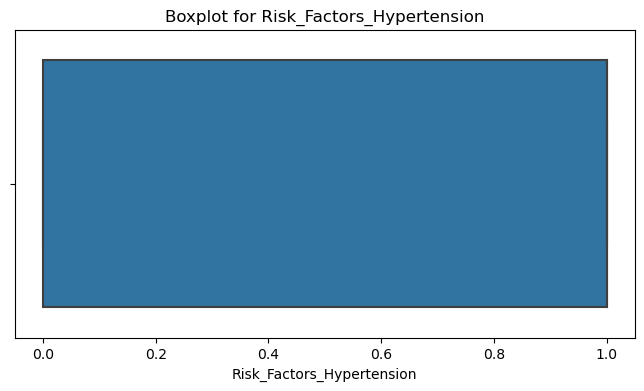

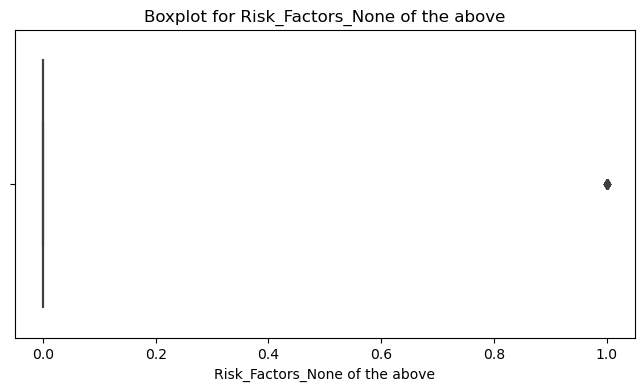

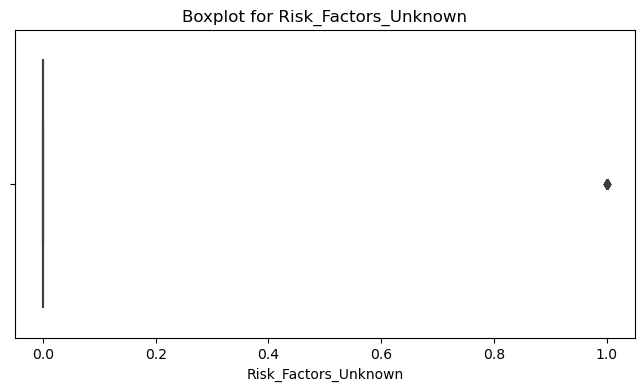

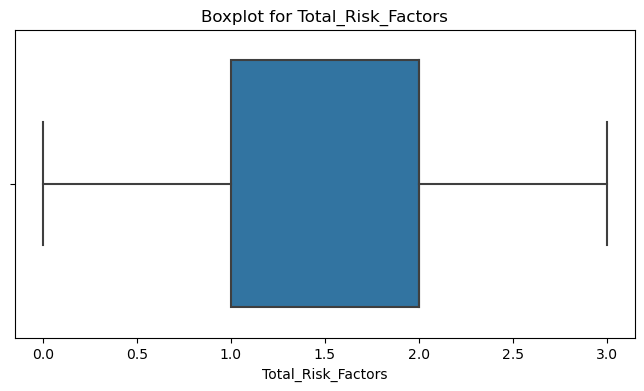

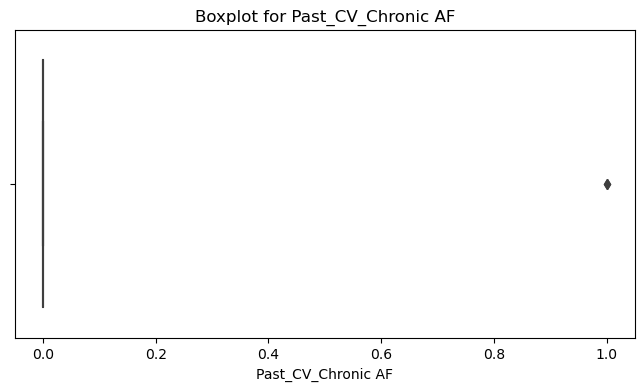

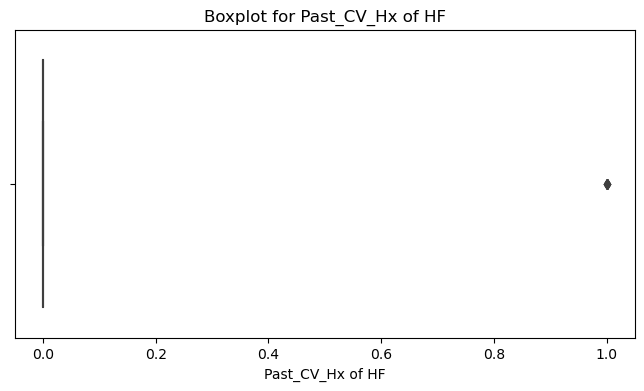

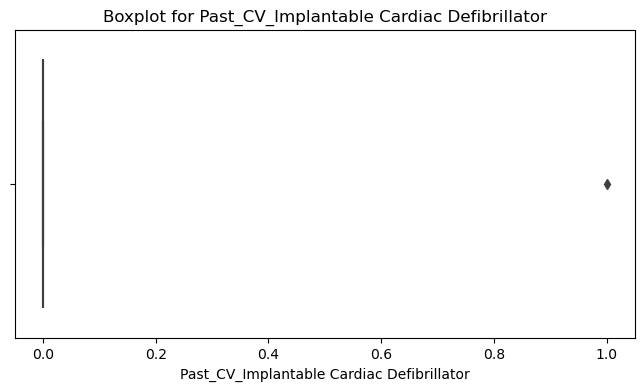

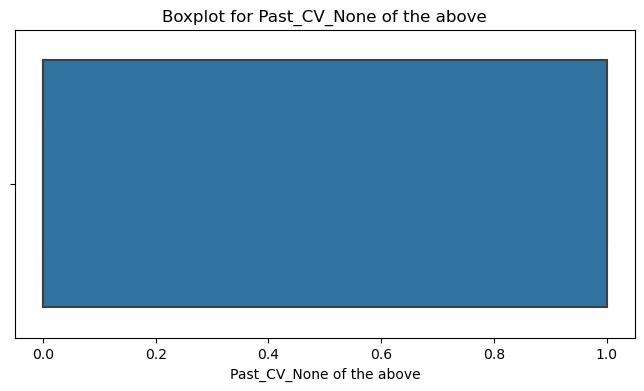

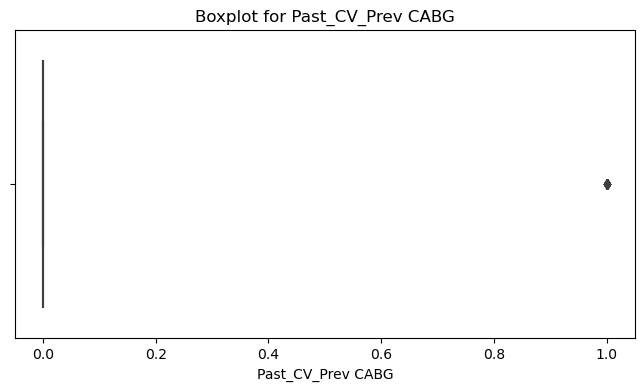

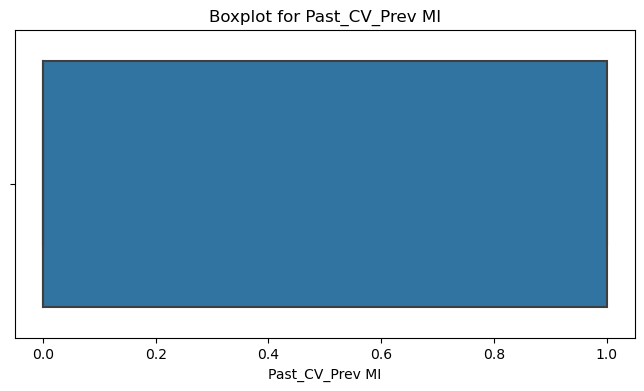

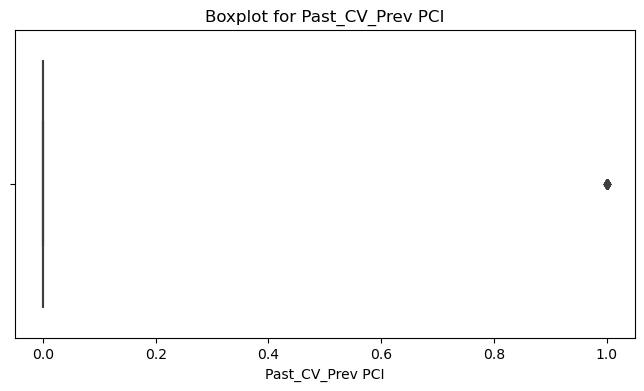

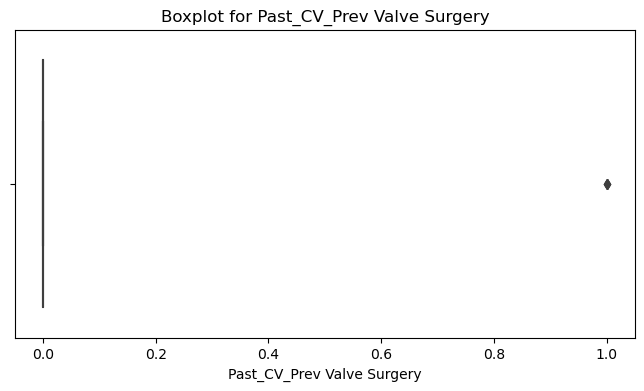

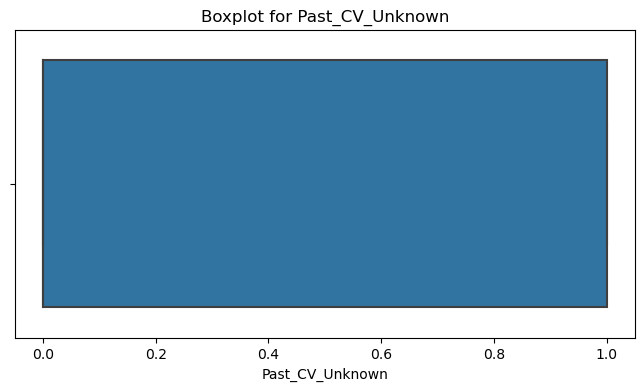

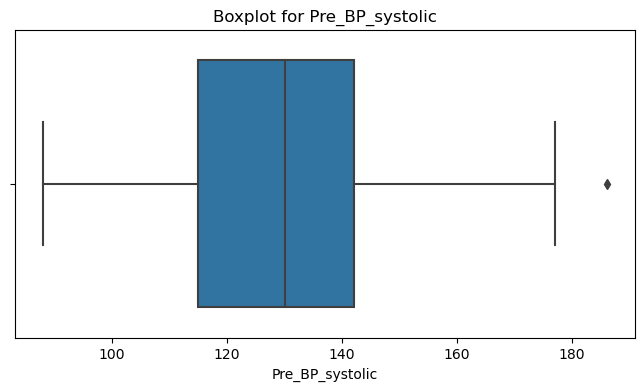

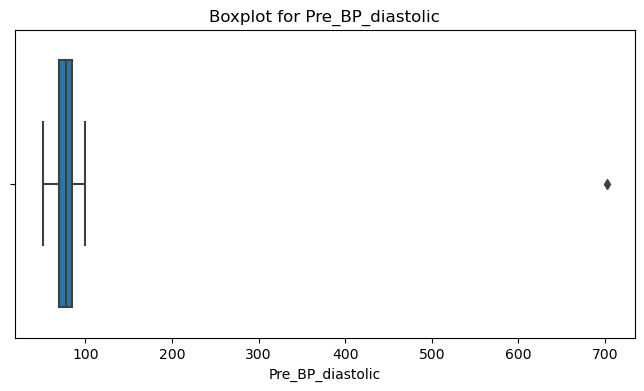

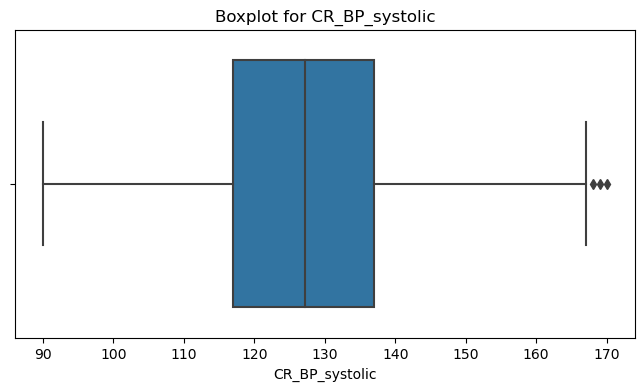

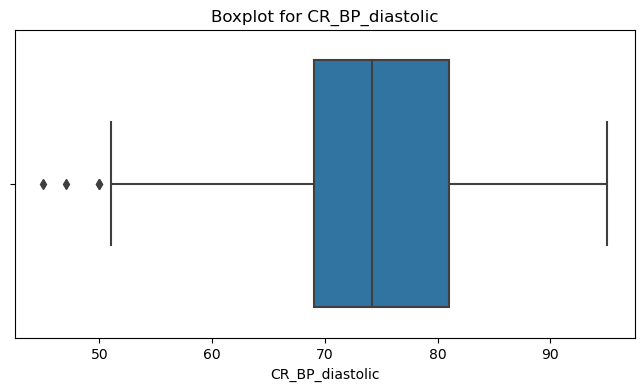

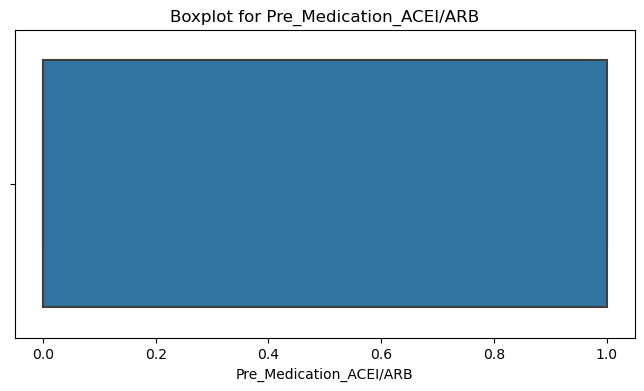

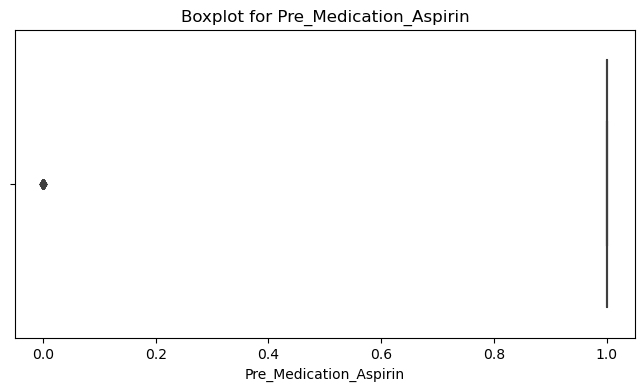

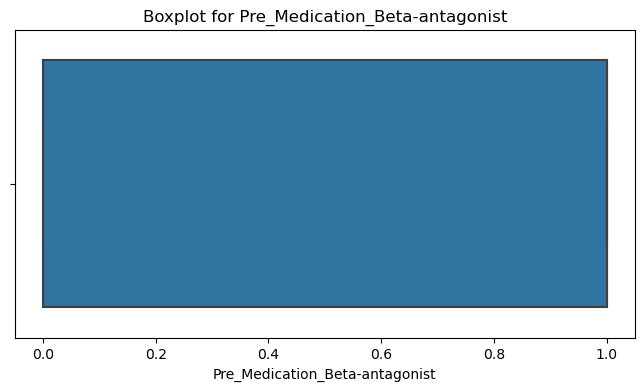

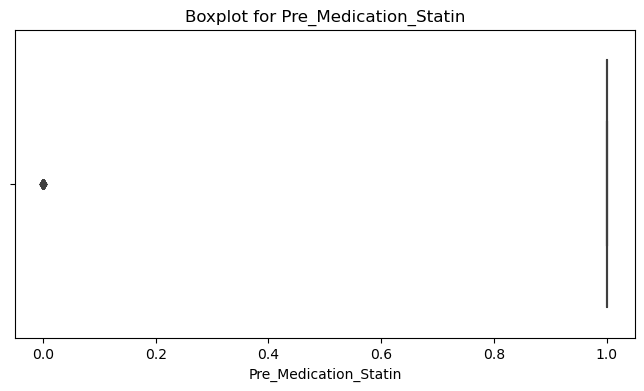

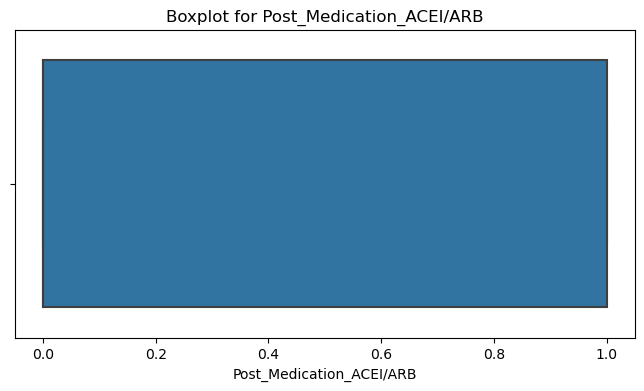

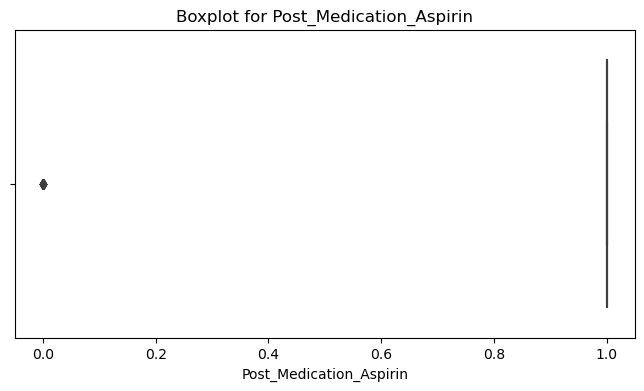

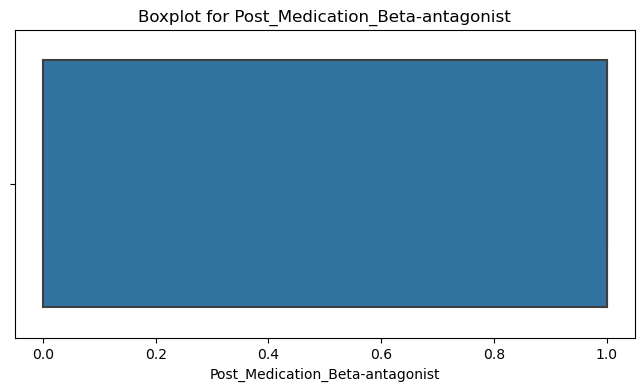

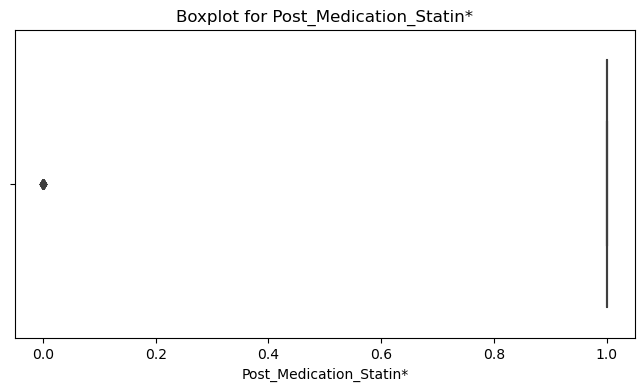

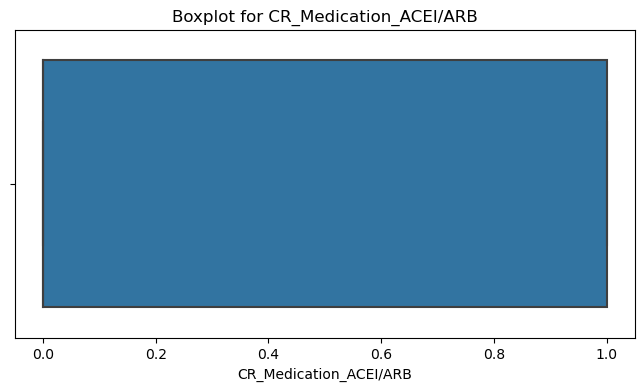

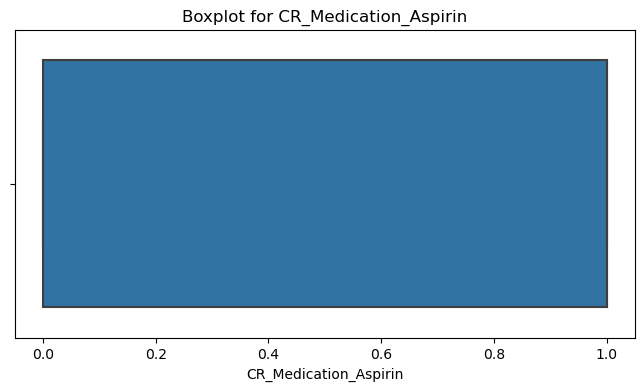

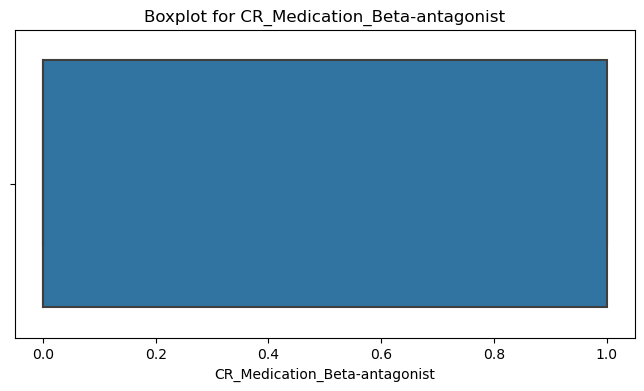

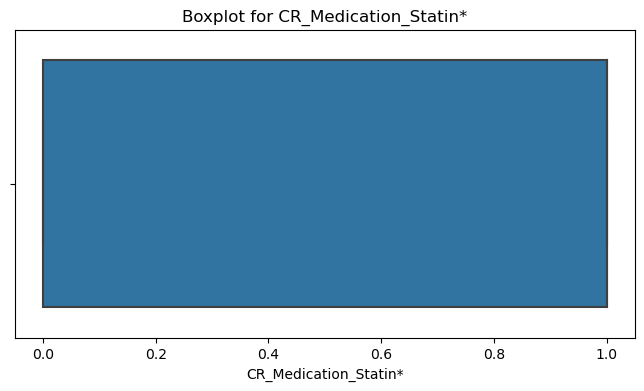

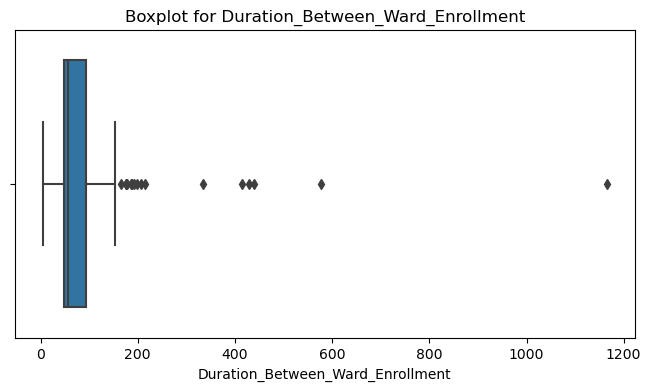

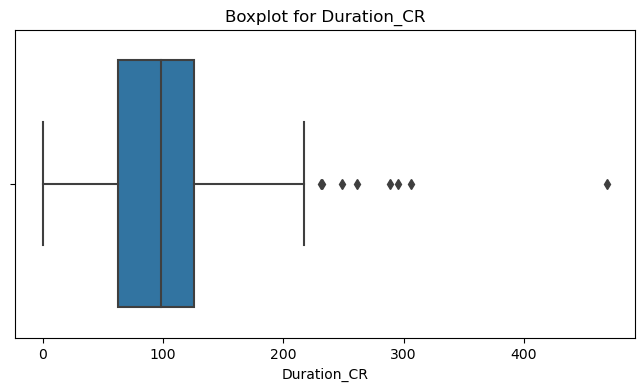

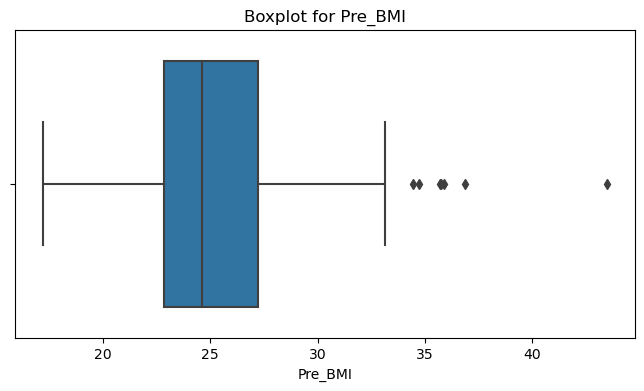

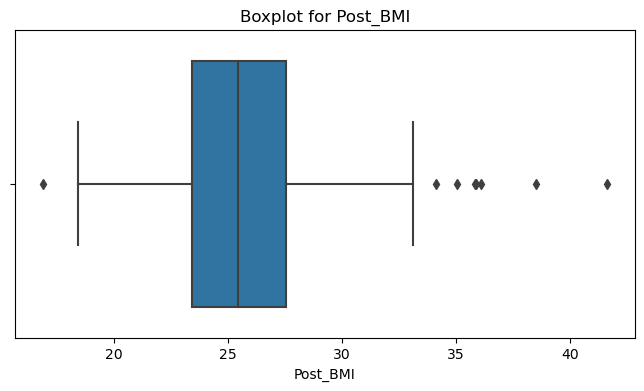

In [29]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [13]:
#drop column with too many missing column
missing_col = ['Post_Peak_Heart_Rate','Post_Peak_Heart_Rate_range','Unexpected_Events', 'Exercise_intensity', 'Anxiety_Scores', 'Depression_Scores']
df = df.drop(missing_col,axis=1).copy()

In [30]:
df.describe()

,Triglyceride,HDL,LDL,HbA1c,Pre_Weight,Post_Weight,Height,Pre_Peak_Heart_Rate,Pre_METs,Post_Peak_METs,...,Post_Medication_Beta-antagonist,Post_Medication_Statin*,CR_Medication_ACEI/ARB,CR_Medication_Aspirin,CR_Medication_Beta-antagonist,CR_Medication_Statin*,Duration_Between_Ward_Enrollment,Duration_CR,Pre_BMI,Post_BMI
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,167.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,1.528412,1.014260,2.635207,6.331646,114.015337,71.230667,165.513855,133.890511,7.047305,9.090678,...,0.554913,0.867052,0.358382,0.699422,0.473988,0.699422,88.595376,101.843931,25.279717,25.861699
std,1.012313,0.444145,1.311552,1.561979,550.295018,12.067600,7.647890,20.270175,2.658807,2.385323,...,0.498418,0.340504,0.480917,0.459840,0.500772,0.459840,111.785761,67.337694,3.998495,3.734295
min,0.000000,0.000000,0.000000,3.700000,42.900000,41.600000,145.000000,78.000000,2.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,17.208067,16.876952
25%,1.000000,0.890000,1.870000,5.400000,61.300000,64.600000,160.500000,122.000000,4.650000,8.600000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,48.000000,62.000000,22.852891,23.433928
50%,1.300000,1.020000,2.635207,5.900000,69.000000,71.230667,166.000000,133.890511,7.000000,9.090678,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,56.000000,98.000000,24.611168,25.442602
75%,2.000000,1.240000,3.620000,6.700000,79.100000,77.200000,171.000000,146.000000,9.250000,10.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,126.000000,27.239224,27.531229
max,6.400000,2.200000,5.770000,12.500000,7307.000000,106.000000,185.000000,196.000000,13.400000,13.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1165.000000,469.000000,43.454735,41.623309


In [15]:
#check for unique values
for i in df.columns:
    print(i + " : ",format(len(df[i].value_counts())))
    print("\n")

Race :  5


Patient_occupation :  3


CR_Intake :  2


Prescribed_Sessions :  4


AACVPR_Risk_Category :  5


CR_Adherence :  3


Triglyceride :  36


HDL :  77


LDL :  139


HbA1c :  53


Pre_Tobacco :  3


Post_Tobacco :  3


Pre_Weight :  139


Post_Weight :  126


Height :  59


Pre_Exercise_Stress_Test :  3


Pre_Peak_Heart_Rate :  62


Pre_METs :  66


Post_Exercise_Stress_Test :  3


Post_Peak_METs :  61


Exercise_frequency_mins_week :  16


Exercise_frequency_sessions_week :  13


Pre_RTW :  2


Post_RTW :  2


Pre_Return_to_drive :  2


Post_Return_to_drive :  2


Pre_erectile_dysfunction :  2


Post_erectile_dysfunction :  2


MACCE :  2


Age :  44


Gender :  2


Pre_Left_Ventricle_EF :  3


Admission_Diagnosis_Angina :  2


Admission_Diagnosis_Arrhythmia :  2


Admission_Diagnosis_CABG :  2


Admission_Diagnosis_Heart Failure :  2


Admission_Diagnosis_NSTEMI :  2


Admission_Diagnosis_Other cardiothoracic procedures :  2


Admission_Diagnosis_PCI :  2


Admission_Diagno

In [16]:
#Check for null for AACVPR Risk Category
df['AACVPR_Risk_Category']

0                    Low
1           Intermediate
2           Intermediate
3           Intermediate
4                    Low
5                    Low
6                   High
7           Intermediate
8           Intermediate
9                    Low
10                  High
11                  High
12                   Low
13                  High
14                   Low
15          Intermediate
16          Intermediate
17                   Low
18                  High
19                  High
20                  High
21     Did Not Enroll CR
22                  High
23                   Low
24                   Low
25     Did Not Enroll CR
26     Did Not Enroll CR
27                  High
28                   Low
29          Intermediate
30                   Low
31                  High
32                  High
33                   Low
34                  High
35                   Low
36                  High
37                  High
38          Intermediate
39     Did Not Enroll CR


In [17]:
df[df["AACVPR_Risk_Category"] == "Did Not Enroll CR"]

,Race,Patient_occupation,CR_Intake,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Triglyceride,HDL,LDL,HbA1c,...,CR_Completion,Duration_Between_Ward_Enrollment,Duration_CR,Pre_BMI,Post_BMI,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range
21,Indian,Self-employed (excludes housewives),No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,2.3,0.73,3.33,9.4,...,Did not enroll to CR,NaN,0.0,23.031643,23.031643,Overweight,Overweight,Light,Vigorous Intensity,NaN
25,Chinese,Private employment,No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,1.8,1.10,2.48,6.0,...,Did not enroll to CR,NaN,0.0,32.958244,32.958244,Obesity,Obesity,Hard,Vigorous Intensity,NaN
26,Indian,Government servant,No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,1.7,0.87,2.96,6.6,...,Did not enroll to CR,NaN,0.0,27.975955,28.471396,Obesity,Obesity,Very Hard,Vigorous Intensity,Vigorous Intensity
39,Chinese,Self-employed (excludes housewives),No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,2.0,0.92,2.47,4.9,...,Did not enroll to CR,NaN,0.0,24.266667,20.444444,Overweight,Normal,Moderate,Moderate Intensity,Moderate Intensity
79,Indian,Government servant,No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,2.2,1.05,1.75,4.9,...,Did not enroll to CR,NaN,0.0,26.868736,NaN,Overweight,NaN,Moderate,Vigorous Intensity,NaN
89,Malay,Government servant,No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,0.0,0.00,0.00,NaN,...,Did not enroll to CR,NaN,0.0,NaN,NaN,NaN,NaN,Light,Vigorous Intensity,NaN
106,Chinese,Private employment,No,Did Not Enroll CR,Did Not Enroll CR,Did Not Enroll CR,0.0,0.00,0.00,NaN,...,Did not enroll to CR,NaN,0.0,24.242424,NaN,Overweight,NaN,Moderate,Vigorous Intensity,NaN


In [4]:
df[df["AACVPR_Risk_Category"] == "Unknown"]

,Patient_Registration_Number,Race,Education_level,Patient_occupation,Health_funding,CR_Intake,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Triglyceride,...,Duration_Between_Ward_Enrollment,Duration_CR,Pre_BMI,Post_BMI,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Post_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range
84,346136,Indian,Unknown,Private employment,Self funded,Yes,8 weeks,Unknown,Yes,1.3,...,NaN,NaN,NaN,28.634435,NaN,Obesity,NaN,NaN,NaN,NaN
98,3656349,Unknown,Unknown,Private employment,Self funded,Yes,8 weeks,Unknown,Yes,0.9,...,NaN,NaN,NaN,21.283705,NaN,Normal,NaN,Very Light,NaN,Moderate Intensity
118,5027403,Malay,Some secondary education,Private employment,Fully Funded,Yes,8 weeks,Unknown,Yes,2.5,...,141.0,76.0,28.717678,29.997365,Obesity,Obesity,NaN,NaN,NaN,NaN
124,6456014,Chinese,Some secondary education,Private employment,Self funded,Yes,8 weeks,Unknown,Yes,0.7,...,115.0,89.0,21.093750,18.164062,Normal,Underweight,NaN,NaN,Light Intensity,Light Intensity


In [18]:
df = df[df["AACVPR_Risk_Category"] != "Did Not Enroll CR"]
df = df.reset_index(drop=True)

In [19]:
df[df["AACVPR_Risk_Category"] == "Unknown"]
df = df[df["AACVPR_Risk_Category"] != "Unknown"]
df = df.reset_index(drop=True)

In [20]:
df['AACVPR_Risk_Category']

0               Low
1      Intermediate
2      Intermediate
3      Intermediate
4               Low
5               Low
6              High
7      Intermediate
8      Intermediate
9               Low
10             High
11             High
12              Low
13             High
14              Low
15     Intermediate
16     Intermediate
17              Low
18             High
19             High
20             High
21             High
22              Low
23              Low
24             High
25              Low
26     Intermediate
27              Low
28             High
29             High
30              Low
31             High
32              Low
33             High
34             High
35     Intermediate
36     Intermediate
37     Intermediate
38     Intermediate
39             High
40     Intermediate
41             High
42     Intermediate
43             High
44             High
45              Low
46     Intermediate
47              Low
48              Low
49             High


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 88 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Race                                                 173 non-null    category
 1   Patient_occupation                                   173 non-null    category
 2   CR_Intake                                            173 non-null    category
 3   Prescribed_Sessions                                  173 non-null    category
 4   AACVPR_Risk_Category                                 173 non-null    category
 5   CR_Adherence                                         173 non-null    category
 6   Triglyceride                                         170 non-null    float64 
 7   HDL                                                  169 non-null    float64 
 8   LDL                                                  169 non